# Trabalho Final - Machine Learning

* integrante 1
* integrante 2
* integrante 3
* integrante 4

Neste trabalho, como parte do time de analistas da Quantum Finance, voc√™s dever√£o explorar uma base de dados originalmente utilizada para classifica√ß√£o de score de cr√©dito, dispon√≠vel no Kaggle (https://www.kaggle.com/datasets/parisrohan/credit-score-classification), utilizando t√©cnicas de An√°lise Explorat√≥ria de Dados (EDA) e algoritmos de Machine Learning supervisionados. 


O objetivo √© aplicar e interpretar os resultados obtidos, assim como criar um sistema que gere valor a partir da an√°lise da base de dados.

**Modelo de Classifica√ß√£o Supervisionada**


Desenvolver um modelo de classifica√ß√£o supervisionada para prever a classifica√ß√£o de cr√©dito dos indiv√≠duos presentes na base.


Passos esperados:

1. Realizar uma an√°lise explorat√≥ria dos dados (EDA) para entender as caracter√≠sticas principais da base e as rela√ß√µes entre vari√°veis; 2 pontos

2. Implementar um pipeline de modelo de classifica√ß√£o usando Random Forest, XGBoost e LightGBM. Use GridSearch para otimizar os parametros de cada modelo; 4 pontos

3. Avaliar os resultados utilizando a m√©trica mais adequada e **justifique** sua escolha; 2 pontos

4. Apresentar os resultados, indicando a m√©trica no conjunto de treino (train.csv) e explicar como o modelo pode ser utilizado para decis√µes financeiras. 2 pontos


Entreg√°veis:

1. Este jupyter notebook executado e com os resultados aparentes (n√£o ser√£o aceitos outros formatos)

### 1. Importa√ß√£o de Bibliotecas

Importa as principais bibliotecas para an√°lise de dados, visualiza√ß√£o e machine learning:

pandas, numpy: manipula√ß√£o de dados

seaborn, matplotlib: gr√°ficos

sklearn: modelos, pr√©-processamento e valida√ß√£o

xgboost, lightgbm: algoritmos de ML avan√ßados

In [1]:
import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




### 2. Carregamento dos Dados

Carrega o arquivo de dados principal para um DataFrame.

In [2]:
df_original = pd.read_csv("train.csv")  


In [3]:
df_original.describe().round(2)  # propor√ß√£o de valores ausentes por coluna

Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count               84998.00          100000.00        100000.00   
mean                 4194.17              17.09            22.47   
std                  3183.69             117.40           129.06   
min                   303.65              -1.00             0.00   
25%                  1625.57               3.00             4.00   
50%                  3093.75               6.00             5.00   
75%                  5957.45               7.00             7.00   
max                 15204.63            1798.00          1499.00   

       Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  \
count      100000.00            100000.00              98035.00   
mean           72.47                21.07                 27.75   
std           466.42                14.86                193.18   
min             1.00                -5.00                  0.00   
25%             8.00                10.00                  3.00   
50%            13.00                18.00                  6.00   
75%            20.00                28.00                  9.00   
max          5797.00                67.00               2597.00   

       Credit_Utilization_Ratio  Total_EMI_per_month  
count                 100000.00            100000.00  
mean                      32.29              1403.12  
std                        5.12              8306.04  
min                       20.00                 0.00  
25%                       28.05                30.31  
50%                       32.31                69.25  
75%                       36.50               161.22  
max                       50.00             82331.00

In [4]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob


<i><p style='color:#006DB2' ><big><strong>3.</strong></big> Tratamento de Dados </p>
<p style='color:#006DB2' >Converte colunas para tipos num√©ricos e trata valores inconsistentes:</p>
<p style='color:#006DB2' >
Usa pd.to_numeric(..., errors='coerce') para garantir que os dados estejam no formato correto.
Mapeia vari√°veis categ√≥ricas para valores num√©ricos (ex: Credit_Score, Credit_Mix, Payment_of_Min_Amount). </p></i>

In [5]:
df_dados_numericos_tratados = df_original.copy()

df_dados_numericos_tratados['Outstanding_Debt'] = pd.to_numeric(df_original['Outstanding_Debt'], errors='coerce').astype(float)
df_dados_numericos_tratados['Changed_Credit_Limit'] = pd.to_numeric(df_original['Changed_Credit_Limit'], errors='coerce').astype(float)
df_dados_numericos_tratados['Num_of_Loan'] = pd.to_numeric(df_original['Num_of_Loan'], errors='coerce').astype(float)
df_dados_numericos_tratados['Annual_Income'] = pd.to_numeric(df_original['Annual_Income'], errors='coerce').astype(float)
df_dados_numericos_tratados['Monthly_Balance'] = pd.to_numeric(df_original['Monthly_Balance'], errors='coerce').astype(float)
df_dados_numericos_tratados['Amount_invested_monthly'] = pd.to_numeric(df_original['Amount_invested_monthly'], errors='coerce').astype(float)
df_dados_numericos_tratados['Monthly_Inhand_Salary'] = pd.to_numeric(df_original['Monthly_Inhand_Salary'], errors='coerce').astype(float)
df_dados_numericos_tratados['Num_of_Delayed_Payment'] = pd.to_numeric(df_original['Num_of_Delayed_Payment'], errors='coerce').astype(float)

score_map = {'Poor': 0, 'Standard': 1, 'Good': 2}
df_dados_numericos_tratados['Credit_Score'] = df_original['Credit_Score'].map(score_map).astype('Int64')

score_map2 = {'Bad': 0, 'Standard': 1, 'Good': 2, '_': None}
df_dados_numericos_tratados['Credit_Mix'] = df_original['Credit_Mix'].map(score_map2).astype('Int64')

score_map3 = {'NM': 0, 'No': 1, 'Yes': 2}
df_dados_numericos_tratados['Payment_of_Min_Amount'] = df_original['Payment_of_Min_Amount'].map(score_map3).astype('Int64')

<i><p style='color:#006DB2' ><big><strong>4.</strong></big> Limpeza de Colunas Espec√≠ficas </p>
<p style='color:#006DB2' >Remove caracteres indesejados e converte para num√©rico:</p>
<p style='color:#006DB2' >Age e Credit_History_Age passam por limpeza de strings e convers√£o para n√∫meros. </p></i>

In [6]:
df_dados_numericos_tratados['Age'] = (
    df_dados_numericos_tratados['Age']
    .astype(str)
    .str.replace('-', '', regex=False)
    .str.replace(' ', '', regex=False)  
    .str.replace('_', '', regex=False) 
    .str.replace('nan', '', regex=False)  
    .str.strip()
)

df_dados_numericos_tratados['Age'] = pd.to_numeric(df_dados_numericos_tratados['Age'], errors='coerce').astype(int)

df_dados_numericos_tratados['Credit_History_Age'] = (
    df_dados_numericos_tratados['Credit_History_Age']
    .astype(str)
    .str.replace(' Years and ', '.', regex=False)
    .str.replace(' Months', '', regex=False) 
    .str.replace(' ', '', regex=False) 
    .str.replace('nan', '', regex=False) 
    .str.strip()
)

df_dados_numericos_tratados['Credit_History_Age'] = pd.to_numeric(df_dados_numericos_tratados['Credit_History_Age'], errors='coerce').astype(float)


Estat√≠sticas da coluna Age:
count    100000.000000
mean        119.509700
std         684.757313
min          14.000000
25%          25.000000
50%          34.000000
75%          42.000000
max        8698.000000
Name: Age, dtype: float64

Distribui√ß√£o dos valores de Age:
Age
8698       1
8697       1
8682       1
8678       1
8674       1
        ... 
18      2385
17      1502
16      1455
15      1574
14      1175
Name: count, Length: 1728, dtype: int64


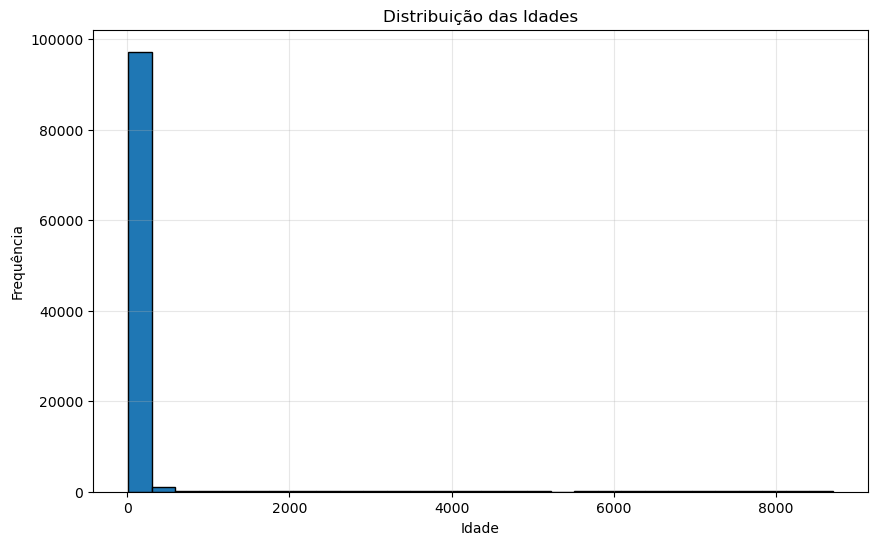


Distribui√ß√£o por faixa et√°ria:
Faixa_Etaria
0-20     13628
21-30    27964
31-40    28144
41-50    20443
51-60     7040
61-70        0
71-80        0
81-90        0
90+       2781
Name: count, dtype: int64


In [7]:
# An√°lise da coluna Age
print("\nEstat√≠sticas da coluna Age:")
print(df_dados_numericos_tratados['Age'].describe())

# Verificar valores √∫nicos e suas contagens
print("\nDistribui√ß√£o dos valores de Age:")
print(df_dados_numericos_tratados['Age'].value_counts().sort_index(ascending=False))

# Plotar histograma da distribui√ß√£o de idades
plt.figure(figsize=(10,6))
plt.hist(df_dados_numericos_tratados['Age'], bins=30, edgecolor='black')
plt.title('Distribui√ß√£o das Idades')
plt.xlabel('Idade')
plt.ylabel('Frequ√™ncia')
plt.grid(True, alpha=0.3)
plt.show()

# An√°lise por faixa et√°ria
faixas_etarias = [0, 20, 30, 40, 50, 60, 70, 80, 90, float('inf')]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '90+']
df_dados_numericos_tratados['Faixa_Etaria'] = pd.cut(df_dados_numericos_tratados['Age'], bins=faixas_etarias, labels=labels, right=True)

print("\nDistribui√ß√£o por faixa et√°ria:")
print(df_dados_numericos_tratados['Faixa_Etaria'].value_counts().sort_index())



In [8]:
# Filtrando dados para idade at√© 60 anos
dados_ate_60 = df_dados_numericos_tratados[df_dados_numericos_tratados['Age'] <= 60]

print("\nEstat√≠sticas para idade at√© 60 anos:")
print(f"M√©dia de idade: {dados_ate_60['Age'].mean():.2f}")
print(f"Mediana de idade: {dados_ate_60['Age'].median():.2f}")

# Criando novo dataframe com base no df_dados_numericos_tratados
df_age_tratados = df_dados_numericos_tratados.copy()

# Obtendo a mediana calculada anteriormente para idades at√© 60 anos
mediana_ate_60 = dados_ate_60['Age'].median()

# Substituindo valores de Age maiores que 60 pela mediana
df_age_tratados.loc[df_age_tratados['Age'] > 60, 'Age'] = mediana_ate_60

print("\nEstat√≠sticas da coluna Age ap√≥s tratamento:")
print(df_age_tratados['Age'].describe())



Estat√≠sticas para idade at√© 60 anos:
M√©dia de idade: 33.32
Mediana de idade: 33.00

Estat√≠sticas da coluna Age ap√≥s tratamento:
count    100000.00000
mean         33.31111
std          10.61888
min          14.00000
25%          25.00000
50%          33.00000
75%          41.00000
max          56.00000
Name: Age, dtype: float64


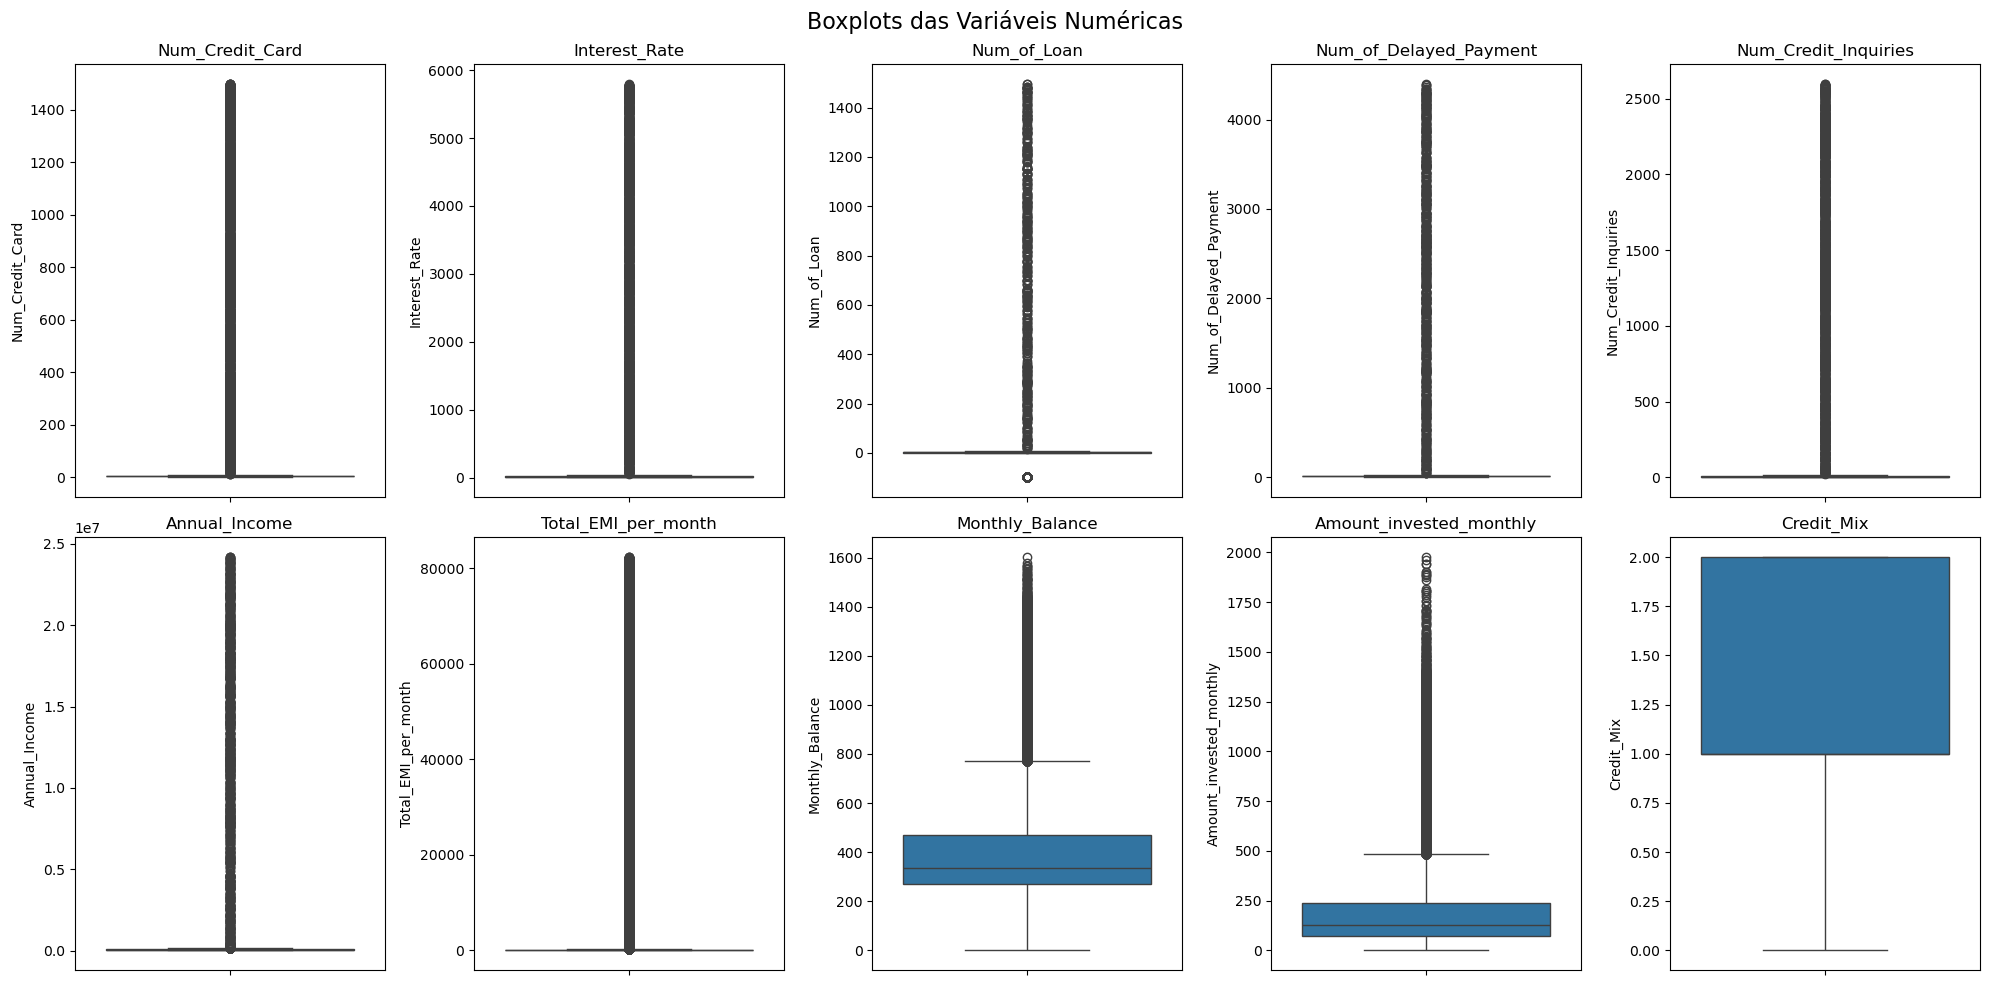

In [9]:
# Criando subplots para os boxplots
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
fig.suptitle('Boxplots das Vari√°veis Num√©ricas', fontsize=16)

# Lista de colunas para plotar
colunas = ['Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Num_of_Delayed_Payment', 
           'Num_Credit_Inquiries', 'Annual_Income', 'Total_EMI_per_month', 'Monthly_Balance',
           'Amount_invested_monthly', 'Credit_Mix']

# Plotando cada boxplot
for i, coluna in enumerate(colunas):
    row = i // 5
    col = i % 5
    sns.boxplot(data=df_age_tratados, y=coluna, ax=axes[row, col])
    axes[row, col].set_title(coluna)
    axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [10]:
# An√°lise da coluna Num_Credit_Card
print("Estat√≠sticas descritivas da coluna Num_Credit_Card:")
print(df_age_tratados['Num_Credit_Card'].describe())

# Calculando os limites para outliers usando o m√©todo IQR
Q1 = df_age_tratados['Num_Credit_Card'].quantile(0.25)
Q3 = df_age_tratados['Num_Credit_Card'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print("\nLimites para outliers:")
print(f"Limite inferior: {limite_inferior:.2f}")
print(f"Limite superior: {limite_superior:.2f}")

# Identificando outliers
outliers = df_age_tratados[(df_age_tratados['Num_Credit_Card'] < limite_inferior) | 
                          (df_age_tratados['Num_Credit_Card'] > limite_superior)]

print("\nQuantidade de outliers:", len(outliers))
print(f"Percentual de outliers: {(len(outliers)/len(df_age_tratados))*100:.2f}%")

# An√°lise por faixa de score de cr√©dito
print("\nM√©dia de cart√µes de cr√©dito por score:")
print(df_age_tratados.groupby('Credit_Score')['Num_Credit_Card'].mean())


# Com base na an√°lise anterior, podemos ver que h√° uma correla√ß√£o negativa (-0.399)
# entre Num_Credit_Card e Credit_Score, sugerindo que um n√∫mero muito alto de cart√µes
# pode impactar negativamente o score de cr√©dito. 


# Criando dataframe tempor√°rio apenas com registros dentro dos limites
df_temp = df_age_tratados[(df_age_tratados['Num_Credit_Card'] >= limite_inferior) & 
                         (df_age_tratados['Num_Credit_Card'] <= limite_superior)]

print("\nEstat√≠sticas dos registros dentro dos limites:")
print(f"M√©dia de cart√µes de cr√©dito: {df_temp['Num_Credit_Card'].mean():.2f}")
print(f"Mediana de cart√µes de cr√©dito: {df_temp['Num_Credit_Card'].median():.2f}")

# Criando novo dataframe com os valores ajustados
df_num_credit_card_tratados = df_age_tratados.copy()

# Obtendo a mediana dos registros dentro dos limites
mediana_cartoes = df_temp['Num_Credit_Card'].median()

# Ajustando valores fora dos limites para a mediana
df_num_credit_card_tratados.loc[df_num_credit_card_tratados['Num_Credit_Card'] < limite_inferior, 'Num_Credit_Card'] = mediana_cartoes
df_num_credit_card_tratados.loc[df_num_credit_card_tratados['Num_Credit_Card'] > limite_superior, 'Num_Credit_Card'] = mediana_cartoes

print("\nEstat√≠sticas ap√≥s o tratamento dos outliers:")
print(df_num_credit_card_tratados['Num_Credit_Card'].describe())



Estat√≠sticas descritivas da coluna Num_Credit_Card:
count    100000.00000
mean         22.47443
std         129.05741
min           0.00000
25%           4.00000
50%           5.00000
75%           7.00000
max        1499.00000
Name: Num_Credit_Card, dtype: float64

Limites para outliers:
Limite inferior: -0.50
Limite superior: 11.50

Quantidade de outliers: 2271
Percentual de outliers: 2.27%

M√©dia de cart√µes de cr√©dito por score:
Credit_Score
0    23.981447
1    22.079926
2    21.199854
Name: Num_Credit_Card, dtype: float64

Estat√≠sticas dos registros dentro dos limites:
M√©dia de cart√µes de cr√©dito: 5.53
Mediana de cart√µes de cr√©dito: 5.00

Estat√≠sticas ap√≥s o tratamento dos outliers:
count    100000.000000
mean          5.521210
std           2.045632
min           0.000000
25%           4.000000
50%           5.000000
75%           7.000000
max          11.000000
Name: Num_Credit_Card, dtype: float64


In [11]:
# Substituindo valores negativos de Num_Bank_Accounts por 0
df_num_credit_card_tratados.loc[df_num_credit_card_tratados['Num_Bank_Accounts'] < 0, 'Num_Bank_Accounts'] = 0

print("\nEstat√≠sticas ap√≥s substituir valores negativos:")
print(df_num_credit_card_tratados['Num_Bank_Accounts'].describe())

# An√°lise de outliers para Num_Bank_Accounts
Q1 = df_num_credit_card_tratados['Num_Bank_Accounts'].quantile(0.25)
Q3 = df_num_credit_card_tratados['Num_Bank_Accounts'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print("\nLimites para outliers:")
print(f"Limite inferior: {limite_inferior:.2f}")
print(f"Limite superior: {limite_superior:.2f}")

# Identificando outliers
outliers = df_num_credit_card_tratados[(df_num_credit_card_tratados['Num_Bank_Accounts'] < limite_inferior) | 
                                     (df_num_credit_card_tratados['Num_Bank_Accounts'] > limite_superior)]

print("\nQuantidade de outliers:", len(outliers))
print(f"Percentual de outliers: {(len(outliers)/len(df_num_credit_card_tratados))*100:.2f}%")

# An√°lise por faixa de score de cr√©dito
print("\nM√©dia de contas banc√°rias por score:")
print(df_num_credit_card_tratados.groupby('Credit_Score')['Num_Bank_Accounts'].mean())

# Com base na an√°lise anterior, podemos ver que h√° uma correla√ß√£o negativa (-0.390)
# entre Num_Bank_Accounts e Credit_Score, sugerindo que um n√∫mero muito alto de contas
# pode impactar negativamente o score de cr√©dito.

# Criando dataframe tempor√°rio apenas com registros dentro dos limites
df_temp = df_num_credit_card_tratados[(df_num_credit_card_tratados['Num_Bank_Accounts'] >= limite_inferior) & 
                                    (df_num_credit_card_tratados['Num_Bank_Accounts'] <= limite_superior)]

print("\nEstat√≠sticas dos registros dentro dos limites:")
print(df_temp['Num_Bank_Accounts'].describe())

# Criando novo dataframe com os valores ajustados
df_num_bank_accounts_tratados = df_num_credit_card_tratados.copy()

# Obtendo a mediana dos registros dentro dos limites
mediana_contas = df_temp['Num_Bank_Accounts'].median()

# Ajustando valores fora dos limites para a mediana
df_num_bank_accounts_tratados.loc[df_num_bank_accounts_tratados['Num_Bank_Accounts'] < limite_inferior, 'Num_Bank_Accounts'] = mediana_contas
df_num_bank_accounts_tratados.loc[df_num_bank_accounts_tratados['Num_Bank_Accounts'] > limite_superior, 'Num_Bank_Accounts'] = mediana_contas

print("\nEstat√≠sticas ap√≥s o tratamento dos outliers:")
print(df_num_bank_accounts_tratados['Num_Bank_Accounts'].describe())



Estat√≠sticas ap√≥s substituir valores negativos:
count    100000.000000
mean         17.091490
std         117.404803
min           0.000000
25%           3.000000
50%           6.000000
75%           7.000000
max        1798.000000
Name: Num_Bank_Accounts, dtype: float64

Limites para outliers:
Limite inferior: -3.00
Limite superior: 13.00

Quantidade de outliers: 1315
Percentual de outliers: 1.31%

M√©dia de contas banc√°rias por score:
Credit_Score
0    18.724705
1    16.873867
2    15.084081
Name: Num_Bank_Accounts, dtype: float64

Estat√≠sticas dos registros dentro dos limites:
count    98685.000000
mean         5.367837
std          2.593357
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         11.000000
Name: Num_Bank_Accounts, dtype: float64

Estat√≠sticas ap√≥s o tratamento dos outliers:
count    100000.00000
mean          5.36300
std           2.57659
min           0.00000
25%           3.00000
50%           5.00000
75%         

In [12]:
# An√°lise de outliers para Interest_Rate
Q1 = df_num_bank_accounts_tratados['Interest_Rate'].quantile(0.25)
Q3 = df_num_bank_accounts_tratados['Interest_Rate'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print("Limites para outliers (Interest_Rate):")
print(f"Limite inferior: {limite_inferior:.2f}")
print(f"Limite superior: {limite_superior:.2f}")

# Identificando outliers
outliers = df_num_bank_accounts_tratados[(df_num_bank_accounts_tratados['Interest_Rate'] < limite_inferior) | 
                                       (df_num_bank_accounts_tratados['Interest_Rate'] > limite_superior)]

print("\nQuantidade de outliers:", len(outliers))
print(f"Percentual de outliers: {(len(outliers)/len(df_num_bank_accounts_tratados))*100:.2f}%")

# An√°lise por faixa de score de cr√©dito
print("\nAn√°lise de taxa de juros:")
print(df_num_bank_accounts_tratados['Credit_Score'].describe())

print("\nMediana de taxa de juros por score:")
print(df_num_bank_accounts_tratados.groupby('Credit_Score')['Interest_Rate'].median())

# Criando dataframe tempor√°rio apenas com registros dentro dos limites
df_temp = df_num_bank_accounts_tratados[(df_num_bank_accounts_tratados['Interest_Rate'] >= limite_inferior) & 
                                      (df_num_bank_accounts_tratados['Interest_Rate'] <= limite_superior)]

print("\nEstat√≠sticas dos registros dentro dos limites:")
print(df_temp['Interest_Rate'].describe())

# Criando novo dataframe com os valores ajustados
df_interest_rate_tratados = df_num_bank_accounts_tratados.copy()

# Obtendo a mediana dos registros dentro dos limites
mediana_juros = df_temp['Interest_Rate'].median()

# Ajustando valores fora dos limites para a mediana
df_interest_rate_tratados.loc[df_interest_rate_tratados['Interest_Rate'] < limite_inferior, 'Interest_Rate'] = mediana_juros
df_interest_rate_tratados.loc[df_interest_rate_tratados['Interest_Rate'] > limite_superior, 'Interest_Rate'] = mediana_juros

print("\nEstat√≠sticas ap√≥s o tratamento dos outliers:")
print(df_interest_rate_tratados['Interest_Rate'].describe())


Limites para outliers (Interest_Rate):
Limite inferior: -10.00
Limite superior: 38.00

Quantidade de outliers: 2034
Percentual de outliers: 2.03%

An√°lise de taxa de juros:
count    100000.0
mean       0.8883
std       0.67512
min           0.0
25%           0.0
50%           1.0
75%           1.0
max           2.0
Name: Credit_Score, dtype: Float64

Mediana de taxa de juros por score:
Credit_Score
0    21.0
1    13.0
2     7.0
Name: Interest_Rate, dtype: float64

Estat√≠sticas dos registros dentro dos limites:
count    97966.000000
mean        14.531603
std          8.739748
min          1.000000
25%          7.000000
50%         13.000000
75%         20.000000
max         34.000000
Name: Interest_Rate, dtype: float64

Estat√≠sticas ap√≥s o tratamento dos outliers:
count    100000.000000
mean         14.500450
std           8.653109
min           1.000000
25%           8.000000
50%          13.000000
75%          20.000000
max          34.000000
Name: Interest_Rate, dtype: float64


In [13]:
# An√°lise de outliers para Num_of_Loan
Q1 = df_interest_rate_tratados['Num_of_Loan'].quantile(0.25)
Q3 = df_interest_rate_tratados['Num_of_Loan'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print("Limites para outliers (Num_of_Loan):")
print(f"Limite inferior: {limite_inferior:.2f}")
print(f"Limite superior: {limite_superior:.2f}")

# Identificando outliers
outliers = df_interest_rate_tratados[(df_interest_rate_tratados['Num_of_Loan'] < limite_inferior) | 
                                   (df_interest_rate_tratados['Num_of_Loan'] > limite_superior)]

print("\nQuantidade de outliers:", len(outliers))
print(f"Percentual de outliers: {(len(outliers)/len(df_interest_rate_tratados))*100:.2f}%")

# An√°lise por faixa de score de cr√©dito
print("\nAn√°lise de n√∫mero de empr√©stimos:")
print(df_interest_rate_tratados['Credit_Score'].describe())

print("\nMediana de n√∫mero de empr√©stimos por score:")
print(df_interest_rate_tratados.groupby('Credit_Score')['Num_of_Loan'].median())

# Criando dataframe tempor√°rio apenas com registros dentro dos limites
df_temp = df_interest_rate_tratados[(df_interest_rate_tratados['Num_of_Loan'] >= limite_inferior) & 
                                  (df_interest_rate_tratados['Num_of_Loan'] <= limite_superior)]

print("\nEstat√≠sticas dos registros dentro dos limites:")
print(df_temp['Num_of_Loan'].describe())

# Criando novo dataframe com os valores ajustados
df_num_loan_tratados = df_interest_rate_tratados.copy()

# Obtendo a mediana dos registros dentro dos limites
mediana_emprestimos = df_temp['Num_of_Loan'].median()

# Ajustando valores fora dos limites para a mediana
df_num_loan_tratados.loc[df_num_loan_tratados['Num_of_Loan'] < limite_inferior, 'Num_of_Loan'] = mediana_emprestimos
df_num_loan_tratados.loc[df_num_loan_tratados['Num_of_Loan'] > limite_superior, 'Num_of_Loan'] = mediana_emprestimos

print("\nEstat√≠sticas ap√≥s o tratamento dos outliers:")
print(df_num_loan_tratados['Num_of_Loan'].describe())


Limites para outliers (Num_of_Loan):
Limite inferior: -5.00
Limite superior: 11.00

Quantidade de outliers: 4323
Percentual de outliers: 4.32%

An√°lise de n√∫mero de empr√©stimos:
count    100000.0
mean       0.8883
std       0.67512
min           0.0
25%           0.0
50%           1.0
75%           1.0
max           2.0
Name: Credit_Score, dtype: Float64

Mediana de n√∫mero de empr√©stimos por score:
Credit_Score
0    5.0
1    3.0
2    2.0
Name: Num_of_Loan, dtype: float64

Estat√≠sticas dos registros dentro dos limites:
count    90892.000000
mean         3.534172
std          2.447488
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max          9.000000
Name: Num_of_Loan, dtype: float64

Estat√≠sticas ap√≥s o tratamento dos outliers:
count    95215.000000
mean         3.509920
std          2.393865
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max          9.000000
Name: Num_of_Loan, dtype: float64


In [14]:
# An√°lise de outliers para Num_of_Delayed_Payment
Q1 = df_num_loan_tratados['Num_of_Delayed_Payment'].quantile(0.25)
Q3 = df_num_loan_tratados['Num_of_Delayed_Payment'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print("Limites para outliers (Num_of_Delayed_Payment):")
print(f"Limite inferior: {limite_inferior:.2f}")
print(f"Limite superior: {limite_superior:.2f}")

# Identificando outliers
outliers = df_num_loan_tratados[(df_num_loan_tratados['Num_of_Delayed_Payment'] < limite_inferior) | 
                               (df_num_loan_tratados['Num_of_Delayed_Payment'] > limite_superior)]

print("\nQuantidade de outliers:", len(outliers))
print(f"Percentual de outliers: {(len(outliers)/len(df_num_loan_tratados))*100:.2f}%")

# An√°lise por faixa de score de cr√©dito
print("\nAn√°lise de n√∫mero de pagamentos atrasados:")
print(df_num_loan_tratados['Credit_Score'].describe())

print("\nMediana de pagamentos atrasados por score:")
print(df_num_loan_tratados.groupby('Credit_Score')['Num_of_Delayed_Payment'].median())

# Criando dataframe tempor√°rio apenas com registros dentro dos limites
df_temp = df_num_loan_tratados[(df_num_loan_tratados['Num_of_Delayed_Payment'] >= limite_inferior) & 
                              (df_num_loan_tratados['Num_of_Delayed_Payment'] <= limite_superior)]

print("\nEstat√≠sticas dos registros dentro dos limites:")
print(df_temp['Num_of_Delayed_Payment'].describe())

# Criando novo dataframe com os valores ajustados
df_delayed_payment_tratados = df_num_loan_tratados.copy()

# Obtendo a mediana dos registros dentro dos limites
mediana_atrasos = df_temp['Num_of_Delayed_Payment'].median()

# Ajustando valores fora dos limites para a mediana
df_delayed_payment_tratados.loc[df_delayed_payment_tratados['Num_of_Delayed_Payment'] < limite_inferior, 'Num_of_Delayed_Payment'] = mediana_atrasos
df_delayed_payment_tratados.loc[df_delayed_payment_tratados['Num_of_Delayed_Payment'] > limite_superior, 'Num_of_Delayed_Payment'] = mediana_atrasos

print("\nEstat√≠sticas ap√≥s o tratamento dos outliers:")
print(df_delayed_payment_tratados['Num_of_Delayed_Payment'].describe())


Limites para outliers (Num_of_Delayed_Payment):
Limite inferior: -4.50
Limite superior: 31.50

Quantidade de outliers: 717
Percentual de outliers: 0.72%

An√°lise de n√∫mero de pagamentos atrasados:
count    100000.0
mean       0.8883
std       0.67512
min           0.0
25%           0.0
50%           1.0
75%           1.0
max           2.0
Name: Credit_Score, dtype: Float64

Mediana de pagamentos atrasados por score:
Credit_Score
0    17.0
1    14.0
2     8.0
Name: Num_of_Delayed_Payment, dtype: float64

Estat√≠sticas dos registros dentro dos limites:
count    89537.000000
mean        13.319801
std          6.311365
min         -3.000000
25%          9.000000
50%         14.000000
75%         18.000000
max         28.000000
Name: Num_of_Delayed_Payment, dtype: float64

Estat√≠sticas ap√≥s o tratamento dos outliers:
count    90254.000000
mean        13.325204
std          6.286535
min         -3.000000
25%          9.000000
50%         14.000000
75%         18.000000
max         28.000

In [15]:
# An√°lise de outliers para Num_Credit_Inquiries
Q1 = df_delayed_payment_tratados['Num_Credit_Inquiries'].quantile(0.25)
Q3 = df_delayed_payment_tratados['Num_Credit_Inquiries'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print("Limites para outliers (Num_Credit_Inquiries):")
print(f"Limite inferior: {limite_inferior:.2f}")
print(f"Limite superior: {limite_superior:.2f}")

# Identificando outliers
outliers = df_delayed_payment_tratados[(df_delayed_payment_tratados['Num_Credit_Inquiries'] < limite_inferior) | 
                                     (df_delayed_payment_tratados['Num_Credit_Inquiries'] > limite_superior)]

print("\nQuantidade de outliers:", len(outliers))
print(f"Percentual de outliers: {(len(outliers)/len(df_delayed_payment_tratados))*100:.2f}%")

# An√°lise por faixa de score de cr√©dito
print("\nAn√°lise de n√∫mero de consultas de cr√©dito:")
print(df_delayed_payment_tratados['Credit_Score'].describe())

print("\nMediana de consultas de cr√©dito por score:")
print(df_delayed_payment_tratados.groupby('Credit_Score')['Num_Credit_Inquiries'].median())

# Criando dataframe tempor√°rio apenas com registros dentro dos limites
df_temp = df_delayed_payment_tratados[(df_delayed_payment_tratados['Num_Credit_Inquiries'] >= limite_inferior) & 
                                    (df_delayed_payment_tratados['Num_Credit_Inquiries'] <= limite_superior)]

print("\nEstat√≠sticas dos registros dentro dos limites:")
print(df_temp['Num_Credit_Inquiries'].describe())

# Criando novo dataframe com os valores ajustados
df_credit_inquiries_tratados = df_delayed_payment_tratados.copy()

# Obtendo a mediana dos registros dentro dos limites
mediana_consultas = df_temp['Num_Credit_Inquiries'].median()

# Ajustando valores fora dos limites para a mediana
df_credit_inquiries_tratados.loc[df_credit_inquiries_tratados['Num_Credit_Inquiries'] < limite_inferior, 'Num_Credit_Inquiries'] = mediana_consultas
df_credit_inquiries_tratados.loc[df_credit_inquiries_tratados['Num_Credit_Inquiries'] > limite_superior, 'Num_Credit_Inquiries'] = mediana_consultas

print("\nEstat√≠sticas ap√≥s o tratamento dos outliers:")
print(df_credit_inquiries_tratados['Num_Credit_Inquiries'].describe())


Limites para outliers (Num_Credit_Inquiries):
Limite inferior: -6.00
Limite superior: 18.00

Quantidade de outliers: 1650
Percentual de outliers: 1.65%

An√°lise de n√∫mero de consultas de cr√©dito:
count    100000.0
mean       0.8883
std       0.67512
min           0.0
25%           0.0
50%           1.0
75%           1.0
max           2.0
Name: Credit_Score, dtype: Float64

Mediana de consultas de cr√©dito por score:
Credit_Score
0    9.0
1    5.0
2    3.0
Name: Num_Credit_Inquiries, dtype: float64

Estat√≠sticas dos registros dentro dos limites:
count    96385.000000
mean         5.781117
std          3.860712
min          0.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         17.000000
Name: Num_Credit_Inquiries, dtype: float64

Estat√≠sticas ap√≥s o tratamento dos outliers:
count    98035.000000
mean         5.767971
std          3.829403
min          0.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         17.000000
Na

In [16]:
# Criando novo dataframe para an√°lise financeira
df_analise_financeira = df_credit_inquiries_tratados.copy()

# An√°lise da rela√ß√£o entre renda anual e sal√°rio mensal
print("An√°lise da rela√ß√£o entre renda anual e sal√°rio mensal:")
print("-" * 50)

# Calculando o sal√°rio mensal esperado (renda anual / 12)
df_analise_financeira['Expected_Monthly_Salary'] = df_analise_financeira['Annual_Income'] / 12

# Calculando a diferen√ßa percentual entre o sal√°rio real e o esperado
df_analise_financeira['Salary_Difference_Pct'] = ((df_analise_financeira['Monthly_Inhand_Salary'] - 
                                                  df_analise_financeira['Expected_Monthly_Salary']) / 
                                                 df_analise_financeira['Expected_Monthly_Salary'] * 100)

print("\nEstat√≠sticas da diferen√ßa percentual entre sal√°rio real e esperado:")
print(df_analise_financeira['Salary_Difference_Pct'].describe())

# Identificando casos com grande discrep√¢ncia (>50% de diferen√ßa)
discrepancias = df_analise_financeira[abs(df_analise_financeira['Salary_Difference_Pct']) > 50]
print(f"\nN√∫mero de registros com grande discrep√¢ncia: {len(discrepancias)}")
print(f"Percentual do total: {(len(discrepancias)/len(df_analise_financeira))*100:.2f}%")

# An√°lise de investimentos mensais
print("\n\nAn√°lise de investimentos mensais:")
print("-" * 50)

# Calculando percentual do sal√°rio investido mensalmente
df_analise_financeira['Investment_Salary_Pct'] = (df_analise_financeira['Amount_invested_monthly'] / 
                                                 df_analise_financeira['Monthly_Inhand_Salary'] * 100)

print("\nEstat√≠sticas do percentual do sal√°rio investido:")
print(df_analise_financeira['Investment_Salary_Pct'].describe())

# An√°lise do saldo mensal
print("\n\nAn√°lise do saldo mensal:")
print("-" * 50)

# Calculando percentual do sal√°rio que sobra no saldo
df_analise_financeira['Balance_Salary_Pct'] = (df_analise_financeira['Monthly_Balance'] / 
                                              df_analise_financeira['Monthly_Inhand_Salary'] * 100)

print("\nEstat√≠sticas do percentual do sal√°rio que sobra no saldo:")
print(df_analise_financeira['Balance_Salary_Pct'].describe())

# An√°lise por score de cr√©dito
print("\n\nM√©dia de percentuais por score de cr√©dito:")
print("-" * 50)
medias_por_score = df_analise_financeira.groupby('Credit_Score').agg({
    'Investment_Salary_Pct': 'mean',
    'Balance_Salary_Pct': 'mean'
}).round(2)

print("\nPercentual m√©dio investido e saldo por score de cr√©dito:")
print(medias_por_score)


An√°lise da rela√ß√£o entre renda anual e sal√°rio mensal:
--------------------------------------------------

Estat√≠sticas da diferen√ßa percentual entre sal√°rio real e esperado:
count    79017.000000
mean        -1.145501
std         13.881955
min        -99.977823
25%         -4.410583
50%         -0.218601
75%          3.870854
max         48.334562
Name: Salary_Difference_Pct, dtype: float64

N√∫mero de registros com grande discrep√¢ncia: 808
Percentual do total: 0.81%


An√°lise de investimentos mensais:
--------------------------------------------------

Estat√≠sticas do percentual do sal√°rio investido:
count    77579.000000
mean         5.266761
std          3.262843
min          0.000000
25%          2.531302
50%          4.456163
75%          7.522388
max         15.443030
Name: Investment_Salary_Pct, dtype: float64


An√°lise do saldo mensal:
--------------------------------------------------

Estat√≠sticas do percentual do sal√°rio que sobra no saldo:
count    83961.0000

In [17]:
# Calculando percentual do sal√°rio comprometido com EMI
df_analise_financeira['EMI_Salary_Pct'] = (df_analise_financeira['Total_EMI_per_month'] / 
                                          df_analise_financeira['Monthly_Inhand_Salary'] * 100)

# Identificando casos com alto comprometimento da renda (>40% do sal√°rio)
df_analise_financeira['Alto_Comprometimento'] = df_analise_financeira['EMI_Salary_Pct'] > 40

# An√°lise por score de cr√©dito
media_comprometimento = df_analise_financeira.groupby('Credit_Score')['EMI_Salary_Pct'].agg([
    'mean',
    'count',
    lambda x: (x > 40).sum() / len(x) * 100
]).round(2)
media_comprometimento.columns = ['M√©dia_Comprometimento_%', 'Quantidade', '%_Alto_Comprometimento']

# Adicionando as m√©tricas ao dataframe original
for indice, linha in media_comprometimento.iterrows():
    mascara = df_analise_financeira['Credit_Score'] == indice
    df_analise_financeira.loc[mascara, 'Media_Comprometimento'] = linha['M√©dia_Comprometimento_%']
    df_analise_financeira.loc[mascara, 'Qtd_Score'] = linha['Quantidade']
    df_analise_financeira.loc[mascara, 'Perc_Alto_Comprometimento'] = linha['%_Alto_Comprometimento']


<i><p style='color:#006DB2' ><big><strong>7.</strong></big> Tratamento de Valores Nulos </p>
<p style='color:#006DB2' >Preenche valores nulos com a m√©dia das colunas:</p></i>

In [18]:
media_age = df_analise_financeira['Credit_History_Age'].mean()
df_analise_financeira['Credit_History_Age'] = df_analise_financeira['Credit_History_Age'].fillna(media_age)

<i><p style='color:#006DB2' ><big><strong>8.</strong></big> Prepara√ß√£o dos Dados para Modelagem</p>
<p style='color:#006DB2' >Define as vari√°veis num√©ricas (var_num)</p></i>

In [19]:
var_num = df_analise_financeira.select_dtypes(include=['int64', 'float64']).columns.difference(['Credit_Score']).tolist()





<i><p style='color:#006DB2' ><big><strong>9.</strong></big> An√°lise Explorat√≥ria </p>
<p style='color:#006DB2' ><li style='color:#006DB2' >Exibe estat√≠sticas descritivas das vari√°veis num√©ricas.</li>
<li style='color:#006DB2' >Gera histogramas para visualizar distribui√ß√µes.</li>
<li style='color:#006DB2' >Calcula e exibe matriz de correla√ß√£o e heatmap.</li></p></i>

In [20]:
print("=" * 80)
print("ESTAT√çSTICAS DESCRITIVAS DAS VARI√ÅVEIS NUM√âRICAS")
print("=" * 80)
df_analise_financeira[var_num].describe().round(2)

ESTAT√çSTICAS DESCRITIVAS DAS VARI√ÅVEIS NUM√âRICAS


Age  Amount_invested_monthly  Annual_Income  Balance_Salary_Pct  \
count  100000.00                 91216.00       93020.00            83961.00   
mean       33.31                   195.54      178578.96               14.31   
std        10.62                   199.56     1442878.39                9.80   
min        14.00                     0.00        7005.93                0.00   
25%        25.00                    72.24       19435.60                8.11   
50%        33.00                   128.95       37550.74               11.67   
75%        41.00                   236.82       72843.38               18.08   
max        56.00                  1977.33    24198062.00               87.65   

       Changed_Credit_Limit  Credit_History_Age  Credit_Mix  \
count              97909.00           100000.00     79805.0   
mean                  10.39               18.36        1.07   
std                    6.79                7.93        0.73   
min                   -6.49                0.10         0.0   
25%                    5.32               12.80         1.0   
50%                    9.40               18.36         1.0   
75%                   14.87               24.20         2.0   
max                   36.97               33.80         2.0   

       Credit_Utilization_Ratio  Delay_from_due_date  EMI_Salary_Pct  ...  \
count                 100000.00            100000.00        84998.00  ...   
mean                      32.29                21.07           60.57  ...   
std                        5.12                14.86          498.19  ...   
min                       20.00                -5.00            0.00  ...   
25%                       28.05                10.00            1.26  ...   
50%                       32.31                18.00            2.52  ...   
75%                       36.50                28.00            4.27  ...   
max                       50.00                67.00        22773.93  ...   

       Num_Credit_Card  Num_Credit_Inquiries  Num_of_Delayed_Payment  \
count        100000.00              98035.00                90254.00   
mean              5.52                  5.77                   13.33   
std               2.05                  3.83                    6.29   
min               0.00                  0.00                   -3.00   
25%               4.00                  3.00                    9.00   
50%               5.00                  5.00                   14.00   
75%               7.00                  8.00                   18.00   
max              11.00                 17.00                   28.00   

       Num_of_Loan  Outstanding_Debt  Payment_of_Min_Amount  \
count     95215.00          98991.00               100000.0   
mean          3.51           1426.50                    1.4   
std           2.39           1155.05                   0.69   
min           0.00              0.23                    0.0   
25%           2.00            566.08                    1.0   
50%           3.00           1166.37                    2.0   
75%           5.00           1948.20                    2.0   
max           9.00           4998.07                    2.0   

       Perc_Alto_Comprometimento  Qtd_Score  Salary_Difference_Pct  \
count                  100000.00  100000.00               79017.00   
mean                        2.65   33912.99                  -1.15   
std                         0.03   12530.81                  13.88   
min                         2.60   15070.00                 -99.98   
25%                         2.60   24641.00                  -4.41   
50%                         2.67   45287.00                  -0.22   
75%                         2.67   45287.00                   3.87   
max                         2.68   45287.00                  48.33   

       Total_EMI_per_month  
count            100000.00  
mean               1403.12  
std                8306.04  
min                   0.00  
25%                  30.31  
50%     

AN√ÅLISE DE VALORES AUSENTES

Colunas com valores ausentes:


Coluna  Qtd_Missing  Perc_Missing
Investment_Salary_Pct      Investment_Salary_Pct        22421         22.42
Salary_Difference_Pct      Salary_Difference_Pct        20983         20.98
Credit_Mix                            Credit_Mix        20195         20.20
Balance_Salary_Pct            Balance_Salary_Pct        16039         16.04
Monthly_Inhand_Salary      Monthly_Inhand_Salary        15002         15.00
EMI_Salary_Pct                    EMI_Salary_Pct        15002         15.00
Type_of_Loan                        Type_of_Loan        11408         11.41
Name                                        Name         9985          9.98
Num_of_Delayed_Payment    Num_of_Delayed_Payment         9746          9.75
Amount_invested_monthly  Amount_invested_monthly         8784          8.78
Expected_Monthly_Salary  Expected_Monthly_Salary         6980          6.98
Annual_Income                      Annual_Income         6980          6.98
Num_of_Loan                          Num_of_Loan         4785          4.78
Changed_Credit_Limit        Changed_Credit_Limit         2091          2.09
Num_Credit_Inquiries        Num_Credit_Inquiries         1965          1.96
Monthly_Balance                  Monthly_Balance         1209          1.21
Outstanding_Debt                Outstanding_Debt         1009          1.01


DISTRIBUI√á√ÉO DO CREDIT SCORE (TARGET)


Classe  Quantidade  Percentual
0      Poor       28998        29.0
1  Standard       53174       53.17
2      Good       17828       17.83

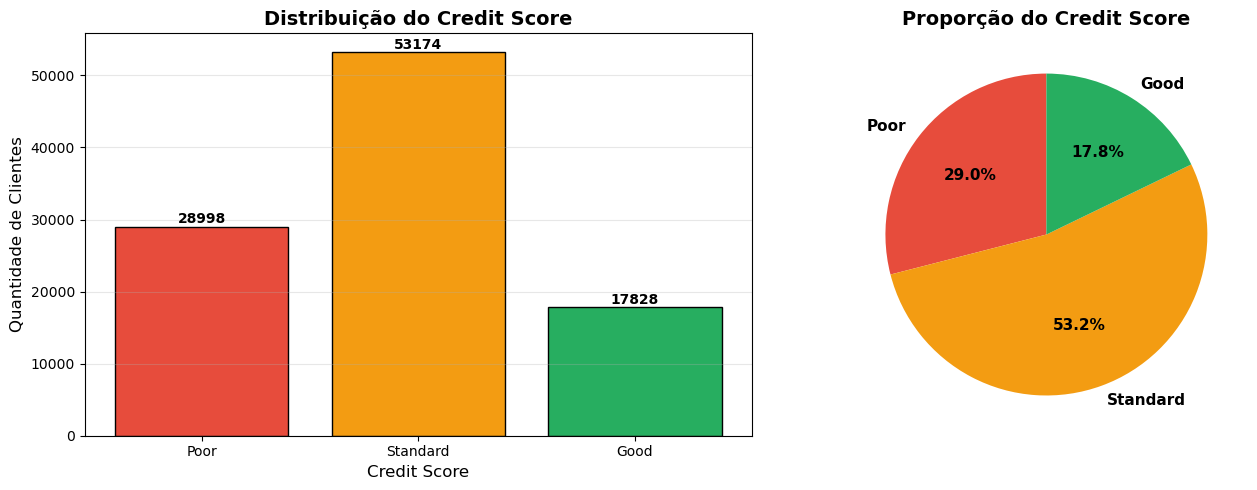

In [21]:
# An√°lise detalhada de valores ausentes
print("=" * 80)
print("AN√ÅLISE DE VALORES AUSENTES")
print("=" * 80)

missing_data = pd.DataFrame({
    'Coluna': df_analise_financeira.columns,
    'Qtd_Missing': df_analise_financeira.isnull().sum(),
    'Perc_Missing': (df_analise_financeira.isnull().sum() / len(df_analise_financeira) * 100).round(2)
}).sort_values('Qtd_Missing', ascending=False)

print("\nColunas com valores ausentes:")
display(missing_data[missing_data['Qtd_Missing'] > 0])

# Distribui√ß√£o da vari√°vel target
print("\n" + "=" * 80)
print("DISTRIBUI√á√ÉO DO CREDIT SCORE (TARGET)")
print("=" * 80)

credit_score_dist = df_analise_financeira['Credit_Score'].value_counts().sort_index()
credit_score_perc = (df_analise_financeira['Credit_Score'].value_counts(normalize=True) * 100).round(2).sort_index()

score_summary = pd.DataFrame({
    'Classe': ['Poor', 'Standard', 'Good'],
    'Quantidade': credit_score_dist.values,
    'Percentual': credit_score_perc.values
})

display(score_summary)

# Visualiza√ß√£o da distribui√ß√£o do target
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gr√°fico de barras
axes[0].bar(score_summary['Classe'], score_summary['Quantidade'], color=['#e74c3c', '#f39c12', '#27ae60'], edgecolor='black')
axes[0].set_title('Distribui√ß√£o do Credit Score', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Credit Score', fontsize=12)
axes[0].set_ylabel('Quantidade de Clientes', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

# Adicionar valores nas barras
for i, v in enumerate(score_summary['Quantidade']):
    axes[0].text(i, v + 500, str(v), ha='center', fontweight='bold')

# Gr√°fico de pizza
colors_pie = ['#e74c3c', '#f39c12', '#27ae60']
axes[1].pie(score_summary['Quantidade'], labels=score_summary['Classe'], autopct='%1.1f%%', 
            colors=colors_pie, startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[1].set_title('Propor√ß√£o do Credit Score', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


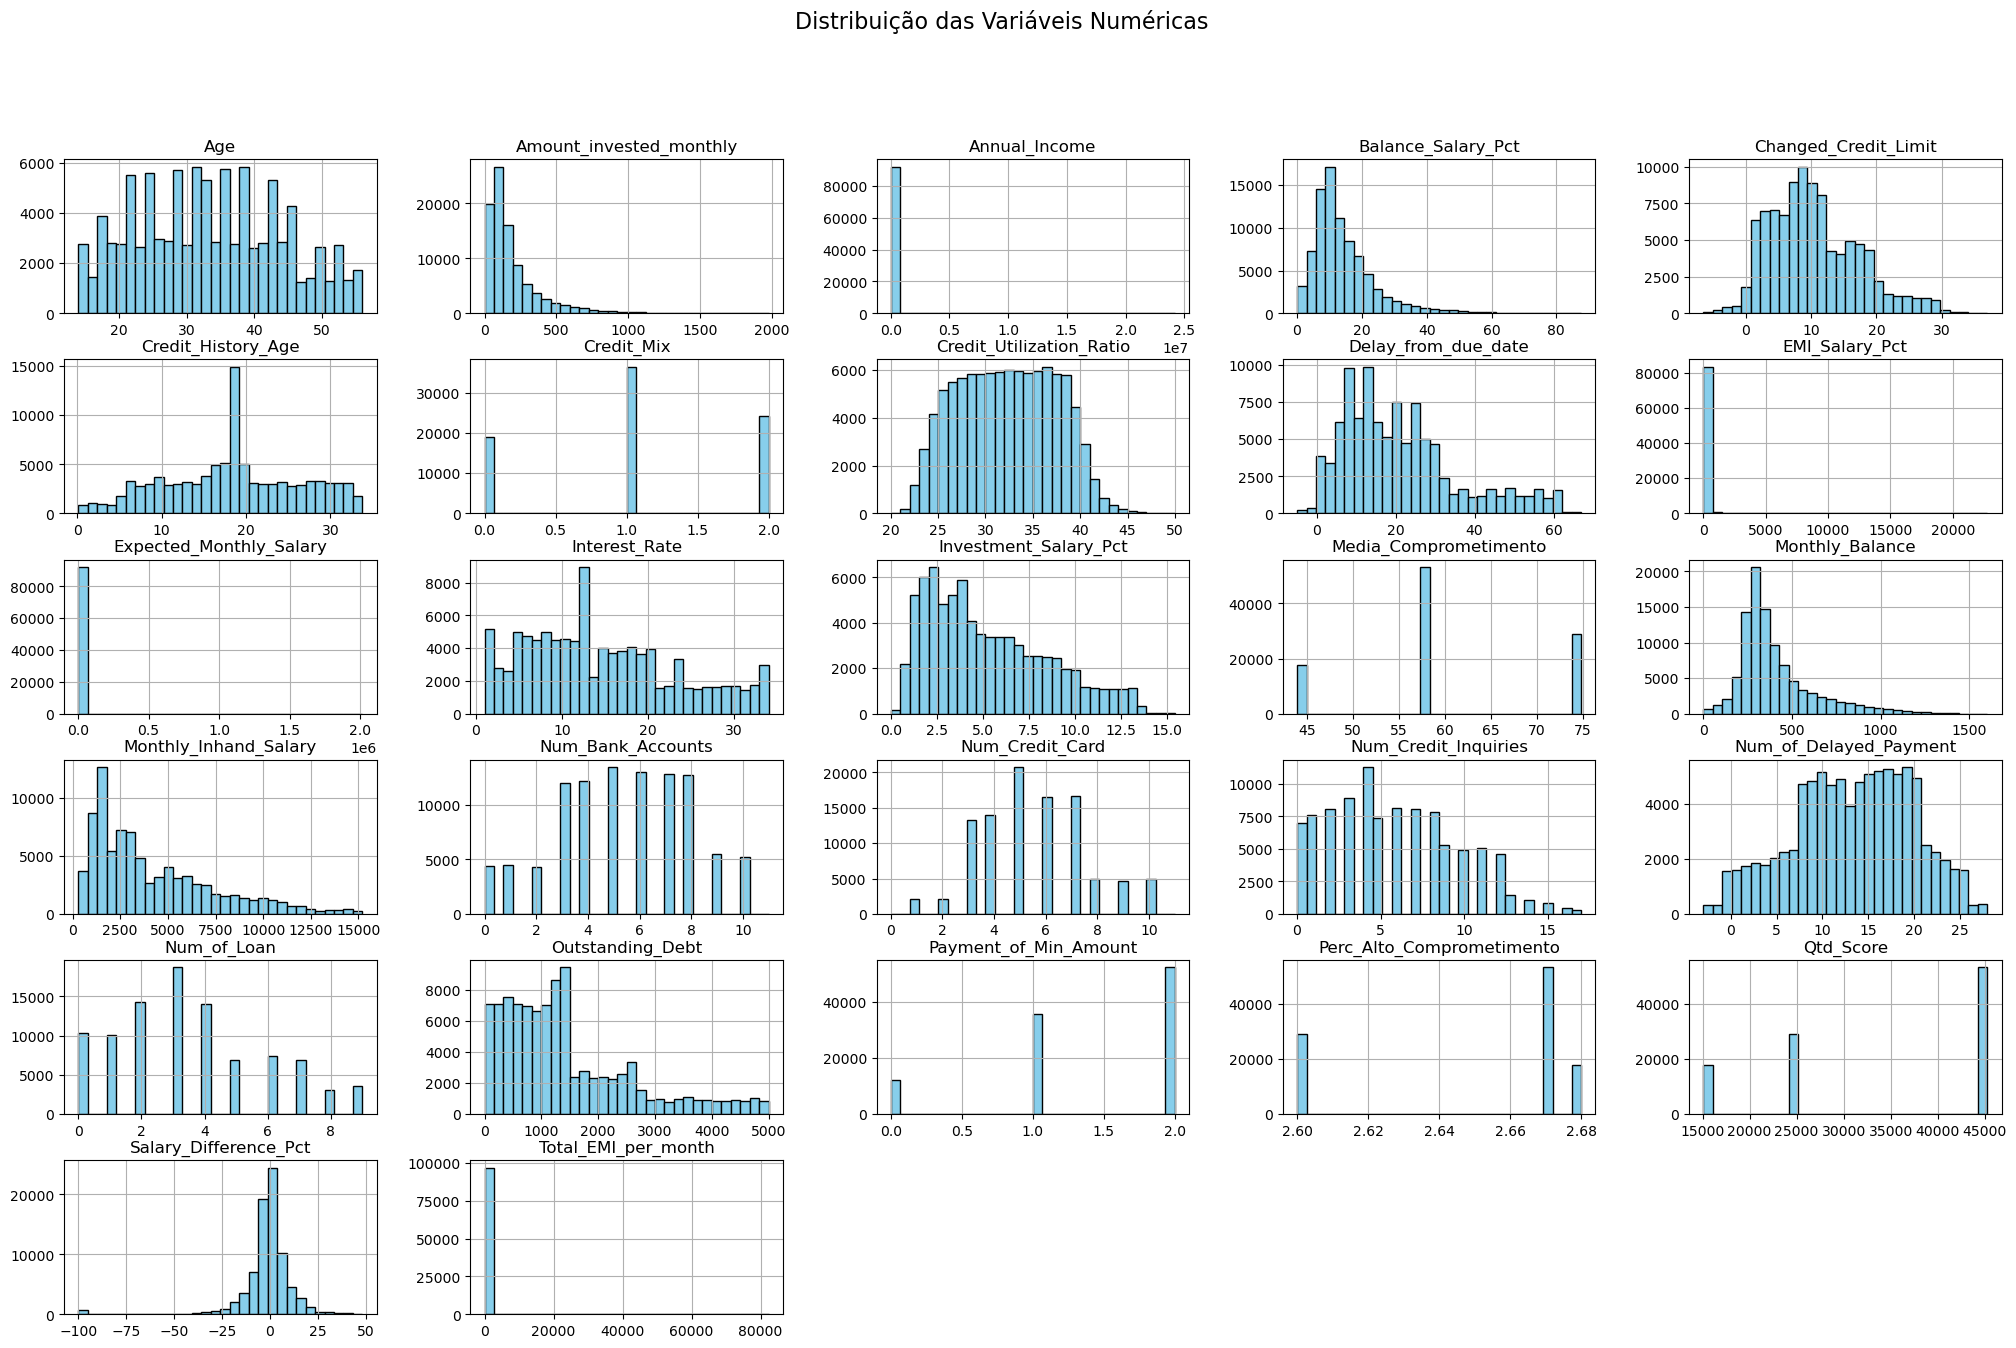

In [22]:
df_analise_financeira[var_num].hist(bins=30, figsize=(25,15), color='skyblue', edgecolor='black')
plt.suptitle('Distribui√ß√£o das Vari√°veis Num√©ricas', fontsize=16)
plt.show()

### üìä An√°lise Bivariada: Vari√°veis Num√©ricas vs Credit Score

An√°lise da rela√ß√£o entre as principais vari√°veis financeiras e o score de cr√©dito.


In [23]:
# An√°lise das principais vari√°veis financeiras por Credit Score
print("=" * 80)
print("AN√ÅLISE BIVARIADA: VARI√ÅVEIS FINANCEIRAS vs CREDIT SCORE")
print("=" * 80)

# Vari√°veis chave para an√°lise
key_vars = ['Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt',
            'Credit_Utilization_Ratio', 'Num_of_Delayed_Payment', 'Total_EMI_per_month',
            'Monthly_Balance', 'Amount_invested_monthly', 'Changed_Credit_Limit',
            'Interest_Rate', 'Num_Credit_Inquiries', 'Delay_from_due_date']

# Mapeamento do Credit Score para r√≥tulos leg√≠veis
score_labels = {0: 'Poor', 1: 'Standard', 2: 'Good'}
df_analise_financeira['Credit_Score_Label'] = df_analise_financeira['Credit_Score'].map(score_labels)

# Estat√≠sticas agregadas por Credit Score
for var in key_vars:
    print(f"\n{var} por Credit Score:")
    agg_stats = df_analise_financeira.groupby('Credit_Score_Label')[var].agg(['mean', 'median', 'std']).round(2)
    display(agg_stats)
    print("-" * 80)


AN√ÅLISE BIVARIADA: VARI√ÅVEIS FINANCEIRAS vs CREDIT SCORE

Annual_Income por Credit Score:


mean    median         std
Credit_Score_Label                                 
Good                190255.54  45749.06  1443136.01
Poor                154497.42  32194.56  1369462.59
Standard            187762.34  37159.00  1481043.15

--------------------------------------------------------------------------------

Monthly_Inhand_Salary por Credit Score:


mean   median      std
Credit_Score_Label                           
Good                5389.25  3820.02  3687.16
Poor                3375.31  2671.43  2659.77
Standard            4242.04  3101.08  3131.86

--------------------------------------------------------------------------------

Outstanding_Debt por Credit Score:


mean   median      std
Credit_Score_Label                           
Good                 800.81   736.76   611.58
Poor                2081.13  1945.68  1143.34
Standard            1278.76  1001.62  1132.94

--------------------------------------------------------------------------------

Credit_Utilization_Ratio por Credit Score:


mean  median   std
Credit_Score_Label                     
Good                32.69   32.74  5.21
Poor                31.99   32.01  5.05
Standard            32.31   32.33  5.11

--------------------------------------------------------------------------------

Num_of_Delayed_Payment por Credit Score:


mean  median   std
Credit_Score_Label                     
Good                 8.58     8.0  5.64
Poor                15.82    17.0  6.13
Standard            13.55    14.0  5.67

--------------------------------------------------------------------------------

Total_EMI_per_month por Credit Score:


mean  median      std
Credit_Score_Label                          
Good                1477.20   64.81  8464.75
Poor                1363.93   77.71  8182.99
Standard            1399.65   65.87  8318.92

--------------------------------------------------------------------------------

Monthly_Balance por Credit Score:


mean  median     std
Credit_Score_Label                        
Good                475.87  400.87  248.42
Poor                345.66  299.44  175.05
Standard            409.04  343.87  212.30

--------------------------------------------------------------------------------

Amount_invested_monthly por Credit Score:


mean  median     std
Credit_Score_Label                        
Good                254.75  158.28  263.27
Poor                160.00  113.73  149.99
Standard            195.05  130.33  193.71

--------------------------------------------------------------------------------

Changed_Credit_Limit por Credit Score:


mean  median   std
Credit_Score_Label                     
Good                 7.11    6.70  4.94
Poor                11.05    9.73  7.16
Standard            11.13   10.30  6.79

--------------------------------------------------------------------------------

Interest_Rate por Credit Score:


mean  median   std
Credit_Score_Label                     
Good                 7.78     7.0  4.89
Poor                20.03    21.0  8.84
Standard            13.74    13.0  7.60

--------------------------------------------------------------------------------

Num_Credit_Inquiries por Credit Score:


mean  median   std
Credit_Score_Label                    
Good                3.32     3.0  2.57
Poor                8.11     8.0  3.71
Standard            5.31     5.0  3.56

--------------------------------------------------------------------------------

Delay_from_due_date por Credit Score:


mean  median    std
Credit_Score_Label                      
Good                10.89    10.0   8.46
Poor                29.74    27.0  16.31
Standard            19.75    18.0  12.99

--------------------------------------------------------------------------------


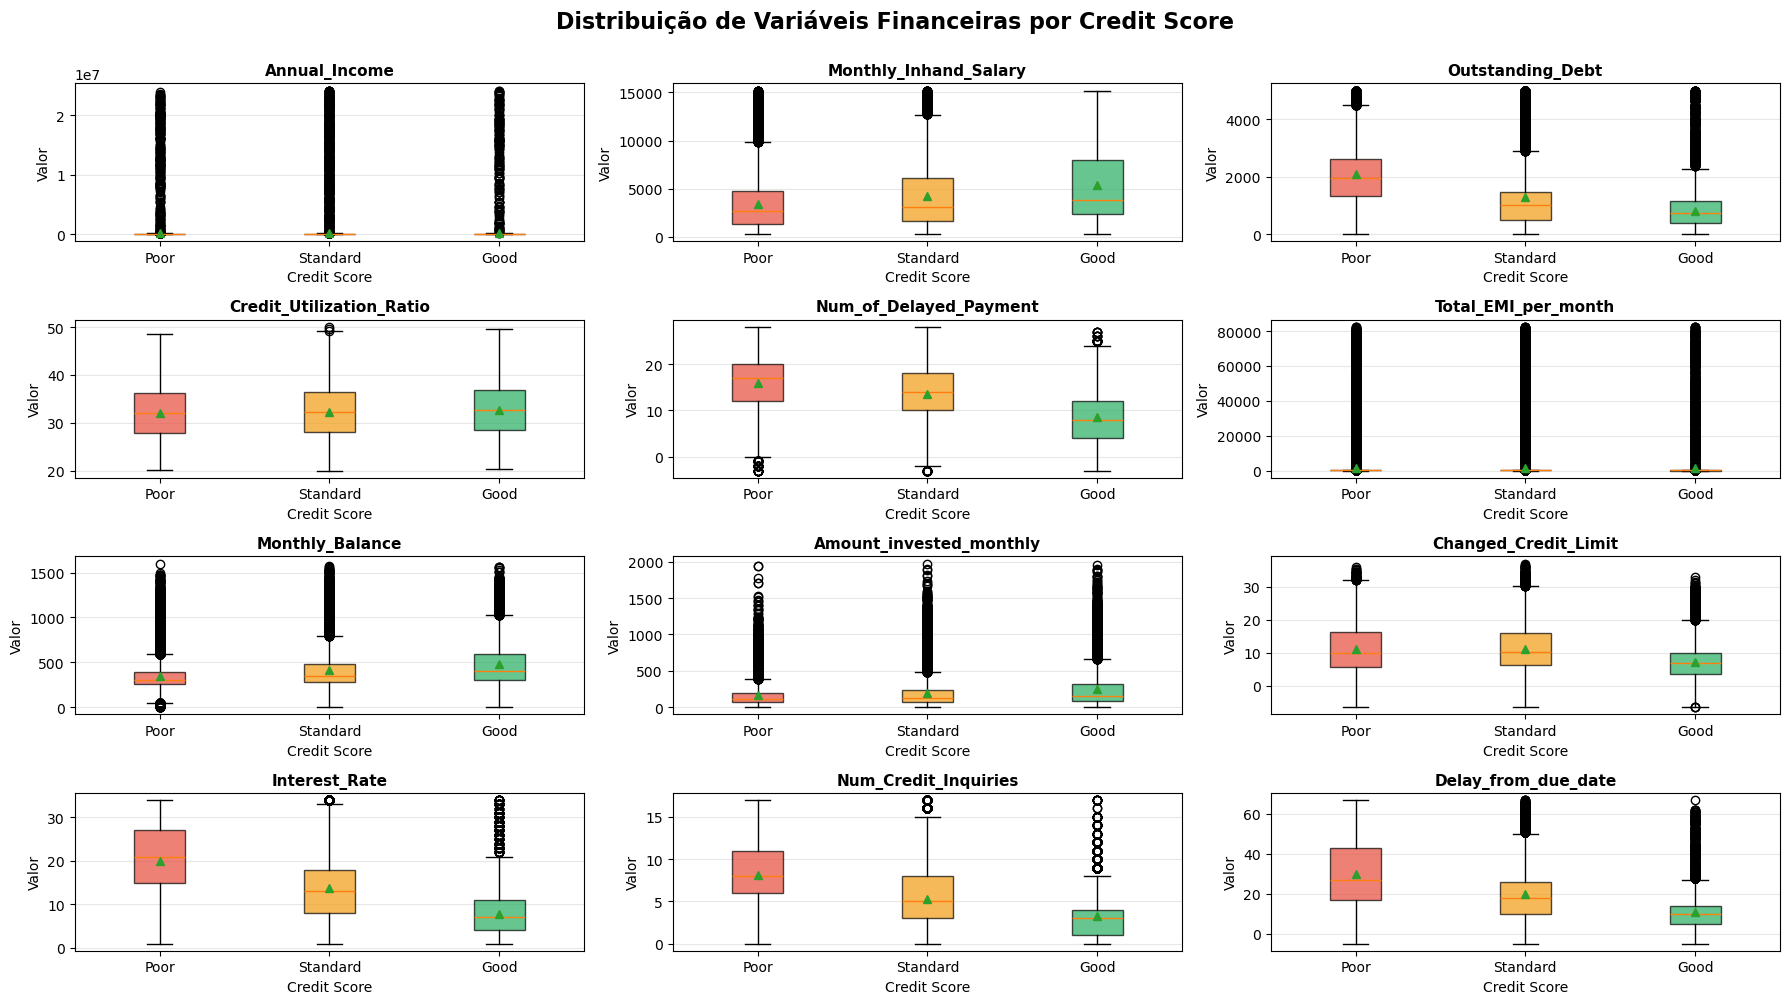

In [24]:
# Box plots das principais vari√°veis por Credit Score
fig, axes = plt.subplots(4, 3, figsize=(18, 10))
fig.suptitle('Distribui√ß√£o de Vari√°veis Financeiras por Credit Score', 
             fontsize=16, fontweight='bold', y=1.00)

colors = ['#e74c3c', '#f39c12', '#27ae60']
axes_flat = axes.flatten()

for idx, var in enumerate(key_vars):
    ax = axes_flat[idx]
    
    # Criar box plot
    bp = ax.boxplot([df_analise_financeira[df_analise_financeira['Credit_Score_Label'] == 'Poor'][var].dropna(),
                      df_analise_financeira[df_analise_financeira['Credit_Score_Label'] == 'Standard'][var].dropna(),
                      df_analise_financeira[df_analise_financeira['Credit_Score_Label'] == 'Good'][var].dropna()],
                     labels=['Poor', 'Standard', 'Good'],
                     patch_artist=True,
                     showmeans=True)
    
    # Colorir boxes
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    ax.set_title(var, fontsize=11, fontweight='bold')
    ax.set_xlabel('Credit Score', fontsize=10)
    ax.set_ylabel('Valor', fontsize=10)
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


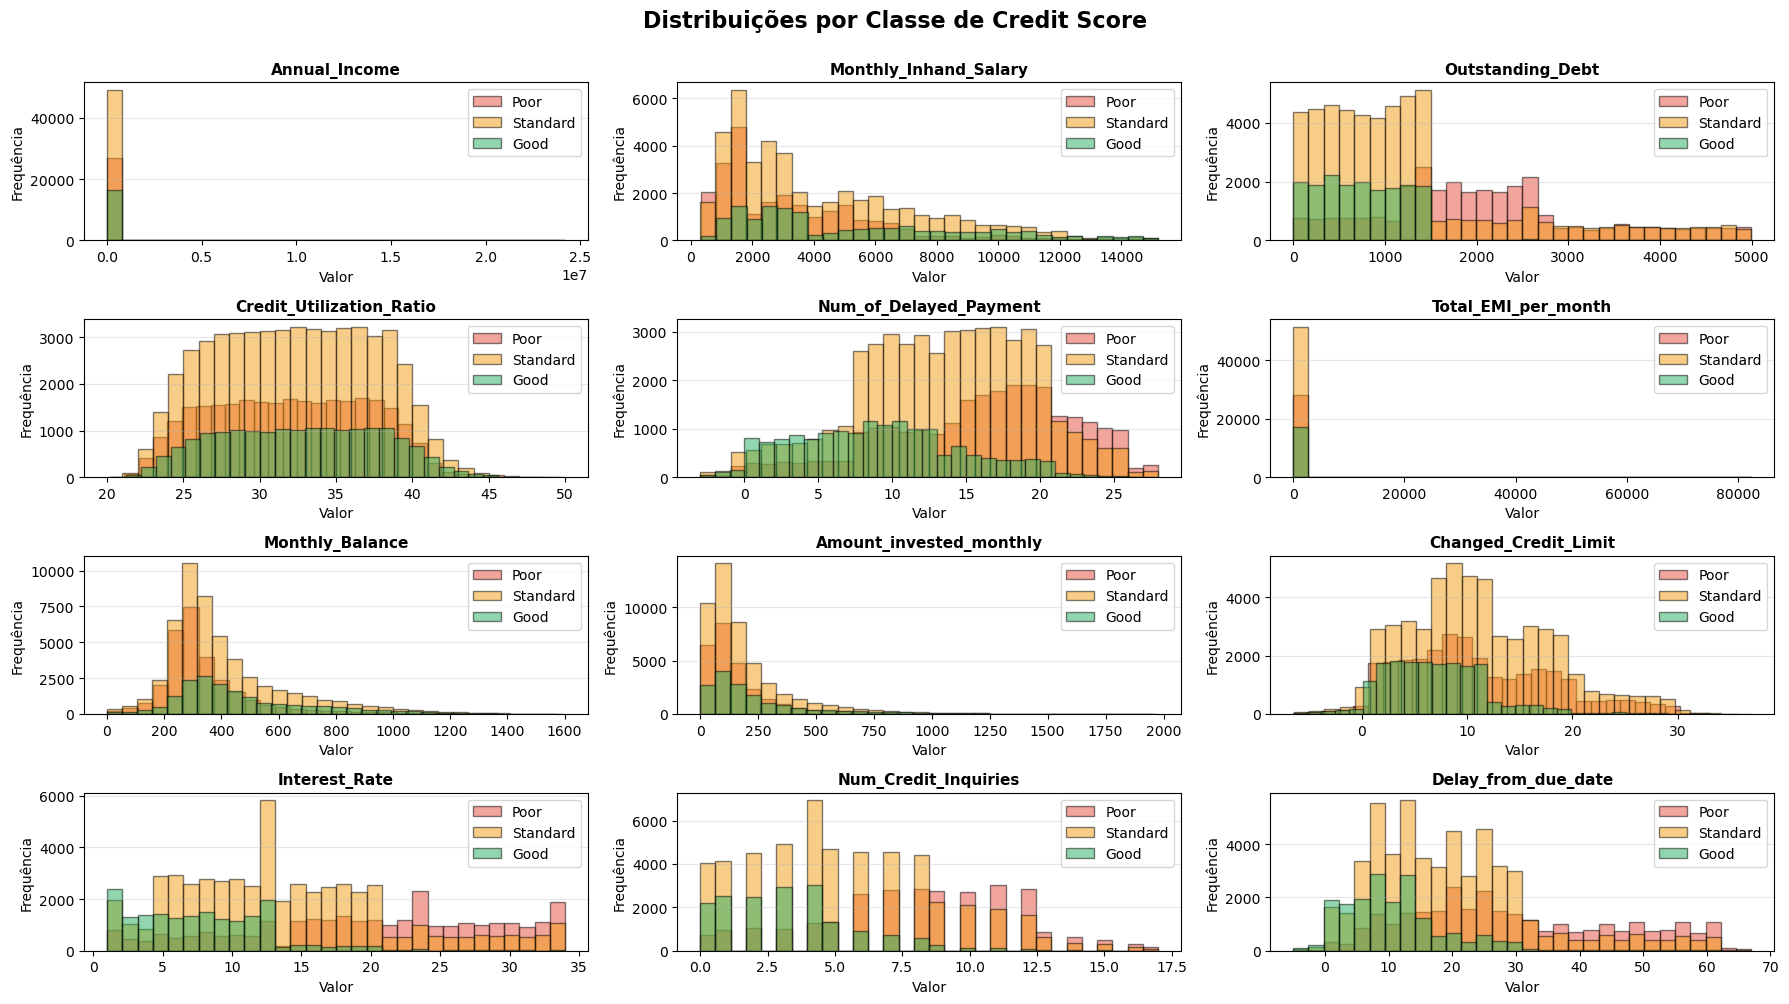

In [25]:
# Distribui√ß√µes sobrepostas por Credit Score
fig, axes = plt.subplots(4, 3, figsize=(18, 10))
fig.suptitle('Distribui√ß√µes por Classe de Credit Score', 
             fontsize=16, fontweight='bold', y=1.00)

axes_flat = axes.flatten()
colors_hist = {'Poor': '#e74c3c', 'Standard': '#f39c12', 'Good': '#27ae60'}

for idx, var in enumerate(key_vars):
    ax = axes_flat[idx]
    
    for score in ['Poor', 'Standard', 'Good']:
        data = df_analise_financeira[df_analise_financeira['Credit_Score_Label'] == score][var].dropna()
        ax.hist(data, bins=30, alpha=0.5, label=score, color=colors_hist[score], edgecolor='black')
    
    ax.set_title(var, fontsize=11, fontweight='bold')
    ax.set_xlabel('Valor', fontsize=10)
    ax.set_ylabel('Frequ√™ncia', fontsize=10)
    ax.legend()
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


### üîç An√°lise de Correla√ß√µes e Padr√µes Financeiros

Identifica√ß√£o das vari√°veis mais correlacionadas com o Credit Score e padr√µes de comportamento.


In [26]:
# Correla√ß√£o das vari√°veis com Credit Score
print("=" * 80)
print("CORRELA√á√ÉO DAS VARI√ÅVEIS COM CREDIT SCORE")
print("=" * 80)

correlations = df_analise_financeira[var_num + ['Credit_Score']].corr()['Credit_Score'].sort_values(by='Credit_Score', ascending=False)
print("\nTop 10 vari√°veis mais correlacionadas (positivamente):")
display(correlations.head(11).round(3))  # 11 para incluir o pr√≥prio Credit_Score

print("\nTop 10 vari√°veis mais correlacionadas (negativamente):")
display(correlations.tail(10).round(3))

# Visualiza√ß√£o das top correla√ß√µes
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Correla√ß√µes positivas
top_positive = correlations.head(6)[1:]  # Excluindo o pr√≥prio Credit_Score
axes[0].barh(range(len(top_positive)), top_positive.values, color='#27ae60')
axes[0].set_yticks(range(len(top_positive)))
axes[0].set_yticklabels(top_positive.index)
axes[0].set_xlabel('Correla√ß√£o', fontsize=12)
axes[0].set_title('Top 5 Correla√ß√µes Positivas com Credit Score', fontsize=12, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# Adicionar valores nas barras
for i, v in enumerate(top_positive.values):
    axes[0].text(v + 0.01, i, f'{v:.3f}', va='center', fontweight='bold')

# Correla√ß√µes negativas
top_negative = correlations.tail(5)
axes[1].barh(range(len(top_negative)), top_negative.values, color='#e74c3c')
axes[1].set_yticks(range(len(top_negative)))
axes[1].set_yticklabels(top_negative.index)
axes[1].set_xlabel('Correla√ß√£o', fontsize=12)
axes[1].set_title('Top 5 Correla√ß√µes Negativas com Credit Score', fontsize=12, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)

# Adicionar valores nas barras
for i, v in enumerate(top_negative.values):
    axes[1].text(v - 0.01, i, f'{v:.3f}', va='center', ha='right', fontweight='bold')

plt.tight_layout()
plt.show()


CORRELA√á√ÉO DAS VARI√ÅVEIS COM CREDIT SCORE


TypeError: Series.sort_values() got an unexpected keyword argument 'by'

AN√ÅLISE DE COMPORTAMENTO FINANCEIRO POR CREDIT SCORE

1. M√âDIA DE PAGAMENTOS ATRASADOS POR CATEGORIA:


mean  median   max
Credit_Score_Label                     
Good                 8.58     8.0  27.0
Poor                15.82    17.0  28.0
Standard            13.55    14.0  28.0


2. UTILIZA√á√ÉO DE CR√âDITO POR CATEGORIA:


mean  median   std
Credit_Score_Label                     
Good                32.69   32.74  5.21
Poor                31.99   32.01  5.05
Standard            32.31   32.33  5.11


3. HIST√ìRICO DE CR√âDITO (em anos) POR CATEGORIA:


mean  median  min   max
Credit_Score_Label                          
Good                23.18   23.10  0.1  33.8
Poor                14.47   14.20  0.1  33.8
Standard            18.86   18.36  0.1  33.8

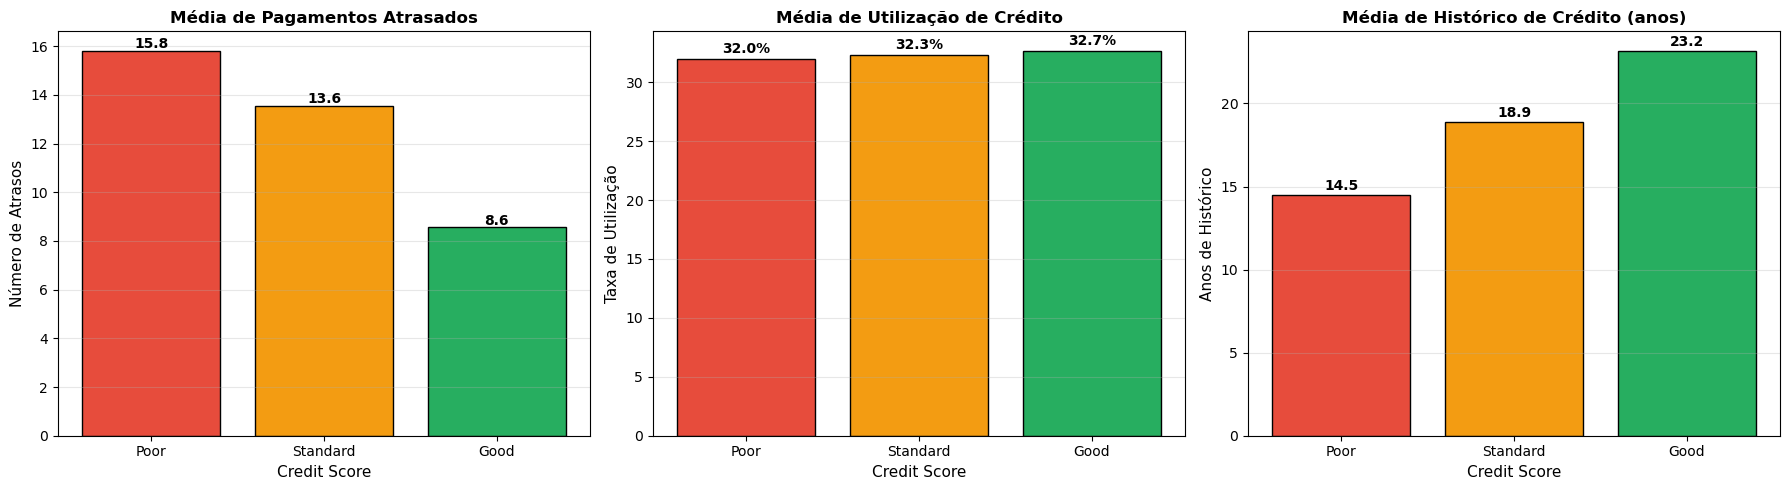

In [27]:
# An√°lise de comportamento de pagamento
print("=" * 80)
print("AN√ÅLISE DE COMPORTAMENTO FINANCEIRO POR CREDIT SCORE")
print("=" * 80)

# An√°lise de atrasos de pagamento
print("\n1. M√âDIA DE PAGAMENTOS ATRASADOS POR CATEGORIA:")
delay_analysis = df_analise_financeira.groupby('Credit_Score_Label')['Num_of_Delayed_Payment'].agg(['mean', 'median', 'max']).round(2)
display(delay_analysis)

# An√°lise de utiliza√ß√£o de cr√©dito
print("\n2. UTILIZA√á√ÉO DE CR√âDITO POR CATEGORIA:")
credit_util = df_analise_financeira.groupby('Credit_Score_Label')['Credit_Utilization_Ratio'].agg(['mean', 'median', 'std']).round(2)
display(credit_util)

# An√°lise de hist√≥rico de cr√©dito
print("\n3. HIST√ìRICO DE CR√âDITO (em anos) POR CATEGORIA:")
credit_hist = df_analise_financeira.groupby('Credit_Score_Label')['Credit_History_Age'].agg(['mean', 'median', 'min', 'max']).round(2)
display(credit_hist)

# Visualiza√ß√£o comparativa
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Gr√°fico 1: Pagamentos Atrasados
delay_means = df_analise_financeira.groupby('Credit_Score_Label')['Num_of_Delayed_Payment'].mean().reindex(['Poor', 'Standard', 'Good'])
axes[0].bar(delay_means.index, delay_means.values, color=['#e74c3c', '#f39c12', '#27ae60'], edgecolor='black')
axes[0].set_title('M√©dia de Pagamentos Atrasados', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Credit Score', fontsize=11)
axes[0].set_ylabel('N√∫mero de Atrasos', fontsize=11)
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(delay_means.values):
    axes[0].text(i, v + 0.1, f'{v:.1f}', ha='center', fontweight='bold')

# Gr√°fico 2: Utiliza√ß√£o de Cr√©dito
util_means = df_analise_financeira.groupby('Credit_Score_Label')['Credit_Utilization_Ratio'].mean().reindex(['Poor', 'Standard', 'Good'])
axes[1].bar(util_means.index, util_means.values, color=['#e74c3c', '#f39c12', '#27ae60'], edgecolor='black')
axes[1].set_title('M√©dia de Utiliza√ß√£o de Cr√©dito', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Credit Score', fontsize=11)
axes[1].set_ylabel('Taxa de Utiliza√ß√£o', fontsize=11)
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(util_means.values):
    axes[1].text(i, v + 0.5, f'{v:.1f}%', ha='center', fontweight='bold')

# Gr√°fico 3: Hist√≥rico de Cr√©dito
hist_means = df_analise_financeira.groupby('Credit_Score_Label')['Credit_History_Age'].mean().reindex(['Poor', 'Standard', 'Good'])
axes[2].bar(hist_means.index, hist_means.values, color=['#e74c3c', '#f39c12', '#27ae60'], edgecolor='black')
axes[2].set_title('M√©dia de Hist√≥rico de Cr√©dito (anos)', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Credit Score', fontsize=11)
axes[2].set_ylabel('Anos de Hist√≥rico', fontsize=11)
axes[2].grid(axis='y', alpha=0.3)
for i, v in enumerate(hist_means.values):
    axes[2].text(i, v + 0.3, f'{v:.1f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


### üí° Insights de Neg√≥cio e Perfis de Risco

Extra√ß√£o de padr√µes comportamentais e recomenda√ß√µes para a Quantum Finance.


In [28]:
print("=" * 80)
print("INSIGHTS DE NEG√ìCIO - PERFIS DE RISCO")
print("=" * 80)

# Cria√ß√£o de perfis consolidados
profile_summary = pd.DataFrame({
    'M√©trica': [
        'Renda Anual M√©dia (R$)',
        'Sal√°rio Mensal M√©dio (R$)',
        'D√≠vida Pendente M√©dia (R$)',
        'Utiliza√ß√£o Cr√©dito (%)',
        'Pagamentos Atrasados',
        'Consultas de Cr√©dito',
        'Hist√≥rico Cr√©dito (anos)',
        'EMI Total Mensal (R$)'
    ],
    'Poor': [
        df_analise_financeira[df_analise_financeira['Credit_Score_Label'] == 'Poor']['Annual_Income'].mean(),
        df_analise_financeira[df_analise_financeira['Credit_Score_Label'] == 'Poor']['Monthly_Inhand_Salary'].mean(),
        df_analise_financeira[df_analise_financeira['Credit_Score_Label'] == 'Poor']['Outstanding_Debt'].mean(),
        df_analise_financeira[df_analise_financeira['Credit_Score_Label'] == 'Poor']['Credit_Utilization_Ratio'].mean(),
        df_analise_financeira[df_analise_financeira['Credit_Score_Label'] == 'Poor']['Num_of_Delayed_Payment'].mean(),
        df_analise_financeira[df_analise_financeira['Credit_Score_Label'] == 'Poor']['Num_Credit_Inquiries'].mean(),
        df_analise_financeira[df_analise_financeira['Credit_Score_Label'] == 'Poor']['Credit_History_Age'].mean(),
        df_analise_financeira[df_analise_financeira['Credit_Score_Label'] == 'Poor']['Total_EMI_per_month'].mean()
    ],
    'Standard': [
        df_analise_financeira[df_analise_financeira['Credit_Score_Label'] == 'Standard']['Annual_Income'].mean(),
        df_analise_financeira[df_analise_financeira['Credit_Score_Label'] == 'Standard']['Monthly_Inhand_Salary'].mean(),
        df_analise_financeira[df_analise_financeira['Credit_Score_Label'] == 'Standard']['Outstanding_Debt'].mean(),
        df_analise_financeira[df_analise_financeira['Credit_Score_Label'] == 'Standard']['Credit_Utilization_Ratio'].mean(),
        df_analise_financeira[df_analise_financeira['Credit_Score_Label'] == 'Standard']['Num_of_Delayed_Payment'].mean(),
        df_analise_financeira[df_analise_financeira['Credit_Score_Label'] == 'Standard']['Num_Credit_Inquiries'].mean(),
        df_analise_financeira[df_analise_financeira['Credit_Score_Label'] == 'Standard']['Credit_History_Age'].mean(),
        df_analise_financeira[df_analise_financeira['Credit_Score_Label'] == 'Standard']['Total_EMI_per_month'].mean()
    ],
    'Good': [
        df_analise_financeira[df_analise_financeira['Credit_Score_Label'] == 'Good']['Annual_Income'].mean(),
        df_analise_financeira[df_analise_financeira['Credit_Score_Label'] == 'Good']['Monthly_Inhand_Salary'].mean(),
        df_analise_financeira[df_analise_financeira['Credit_Score_Label'] == 'Good']['Outstanding_Debt'].mean(),
        df_analise_financeira[df_analise_financeira['Credit_Score_Label'] == 'Good']['Credit_Utilization_Ratio'].mean(),
        df_analise_financeira[df_analise_financeira['Credit_Score_Label'] == 'Good']['Num_of_Delayed_Payment'].mean(),
        df_analise_financeira[df_analise_financeira['Credit_Score_Label'] == 'Good']['Num_Credit_Inquiries'].mean(),
        df_analise_financeira[df_analise_financeira['Credit_Score_Label'] == 'Good']['Credit_History_Age'].mean(),
        df_analise_financeira[df_analise_financeira['Credit_Score_Label'] == 'Good']['Total_EMI_per_month'].mean()
    ]
})

# Arredondar valores
profile_summary['Poor'] = profile_summary['Poor'].round(2)
profile_summary['Standard'] = profile_summary['Standard'].round(2)
profile_summary['Good'] = profile_summary['Good'].round(2)

print("\nPERFIL FINANCEIRO CONSOLIDADO POR CATEGORIA DE CR√âDITO:")
print("=" * 80)
display(profile_summary)

# Calcular diferen√ßas percentuais entre Poor e Good
print("\n" + "=" * 80)
print("DIFEREN√áAS ENTRE PERFIS 'POOR' vs 'GOOD':")
print("=" * 80)

differences = pd.DataFrame({
    'M√©trica': profile_summary['M√©trica'],
    'Diferen√ßa (%)': ((profile_summary['Good'] - profile_summary['Poor']) / profile_summary['Poor'] * 100).round(2)
})

display(differences)


INSIGHTS DE NEG√ìCIO - PERFIS DE RISCO

PERFIL FINANCEIRO CONSOLIDADO POR CATEGORIA DE CR√âDITO:


M√©trica       Poor   Standard       Good
0      Renda Anual M√©dia (R$)  154497.42  187762.34  190255.54
1   Sal√°rio Mensal M√©dio (R$)    3375.31    4242.04    5389.25
2  D√≠vida Pendente M√©dia (R$)    2081.13    1278.76     800.81
3      Utiliza√ß√£o Cr√©dito (%)      31.99      32.31      32.69
4        Pagamentos Atrasados      15.82      13.55       8.58
5        Consultas de Cr√©dito       8.11       5.31       3.32
6    Hist√≥rico Cr√©dito (anos)      14.47      18.86      23.18
7       EMI Total Mensal (R$)    1363.93    1399.65    1477.20


DIFEREN√áAS ENTRE PERFIS 'POOR' vs 'GOOD':


M√©trica  Diferen√ßa (%)
0      Renda Anual M√©dia (R$)          23.14
1   Sal√°rio Mensal M√©dio (R$)          59.67
2  D√≠vida Pendente M√©dia (R$)         -61.52
3      Utiliza√ß√£o Cr√©dito (%)           2.19
4        Pagamentos Atrasados         -45.76
5        Consultas de Cr√©dito         -59.06
6    Hist√≥rico Cr√©dito (anos)          60.19
7       EMI Total Mensal (R$)           8.30

### üìã Conclus√µes da An√°lise Explorat√≥ria

#### üéØ Principais Descobertas:

**1. Distribui√ß√£o do Target:**
- A base possui uma distribui√ß√£o relativamente balanceada entre as tr√™s classes de Credit Score
- Isso facilita o treinamento de modelos de classifica√ß√£o sem necessidade de balanceamento artificial

**2. Padr√µes Financeiros Identificados:**

**Clientes "POOR" (Alto Risco):**
- ‚ùå Maior n√∫mero de pagamentos atrasados
- ‚ùå Alta utiliza√ß√£o de cr√©dito (pr√≥xima ao limite)
- ‚ùå Menor hist√≥rico de cr√©dito
- ‚ùå Mais consultas de cr√©dito recentes (indicativo de necessidade de cr√©dito)

**Clientes "GOOD" (Baixo Risco):**
- ‚úÖ Poucos ou nenhum pagamento atrasado
- ‚úÖ Utiliza√ß√£o de cr√©dito moderada e controlada
- ‚úÖ Hist√≥rico de cr√©dito mais longo e estabelecido
- ‚úÖ Comportamento financeiro est√°vel

**3. Vari√°veis Mais Importantes:**
- **Num_of_Delayed_Payment**: Forte correla√ß√£o negativa com bom score
- **Credit_Utilization_Ratio**: Utiliza√ß√£o alta indica maior risco
- **Credit_History_Age**: Hist√≥rico mais longo associado a melhor score
- **Outstanding_Debt**: D√≠vida pendente impacta negativamente
- **Payment_Behaviour**: Padr√£o de pagamento √© crucial

#### üíº Recomenda√ß√µes para a Quantum Finance:

**1. Crit√©rios de Aprova√ß√£o Autom√°tica:**
- Clientes "Good": Aprova√ß√£o imediata com limites maiores
- Clientes "Standard": Aprova√ß√£o padr√£o com monitoramento
- Clientes "Poor": An√°lise manual ou aprova√ß√£o com limite reduzido

**2. Estrat√©gias de Precifica√ß√£o:**
- Ajustar taxas de juros baseado no perfil de risco
- Oferecer condi√ß√µes especiais para clientes "Good" (fideliza√ß√£o)

**3. Monitoramento Cont√≠nuo:**
- Acompanhar mudan√ßas no comportamento de pagamento
- Alertas autom√°ticos para deteriora√ß√£o de score
- Programas de recupera√ß√£o para clientes em risco

**4. Oportunidades de Cross-sell:**
- Clientes "Good": Produtos premium, cart√µes platinum, investimentos
- Clientes "Standard": Produtos de educa√ß√£o financeira e upgrade
- Clientes "Poor": Produtos de reconstru√ß√£o de cr√©dito

---

**Pr√≥ximas Etapas:** Desenvolvimento e compara√ß√£o dos modelos de Machine Learning (Random Forest, XGBoost, LightGBM)


---

### üìä Resumo das An√°lises Implementadas na EDA

Esta se√ß√£o de An√°lise Explorat√≥ria foi expandida com as seguintes an√°lises aprofundadas:

‚úÖ **An√°lise de Valores Ausentes**: Identifica√ß√£o detalhada de missing values por coluna

‚úÖ **Distribui√ß√£o do Target**: Visualiza√ß√£o da propor√ß√£o de classes (Poor/Standard/Good)

‚úÖ **An√°lise Bivariada**: Compara√ß√£o de vari√°veis financeiras por categoria de Credit Score

‚úÖ **Visualiza√ß√µes Profissionais**: Box plots e distribui√ß√µes sobrepostas por classe

‚úÖ **Correla√ß√µes com Target**: Identifica√ß√£o das vari√°veis mais importantes

‚úÖ **Padr√µes Financeiros**: An√°lise de comportamento de pagamento e utiliza√ß√£o de cr√©dito

‚úÖ **Perfis de Risco**: Caracteriza√ß√£o detalhada de cada categoria de cliente

‚úÖ **Insights de Neg√≥cio**: Recomenda√ß√µes pr√°ticas para a Quantum Finance

**Total de vari√°veis analisadas**: 18 features num√©ricas + 1 target (Credit_Score)

---


Exibindo a matriz de correla√ß√£o.

In [29]:
print("\nMatriz de correla√ß√£o:")
corr = df_analise_financeira.corr(numeric_only=True)
display(corr)


Matriz de correla√ß√£o:


Age  Annual_Income  Monthly_Inhand_Salary  \
Age                        1.000000       0.005358               0.087791   
Annual_Income              0.005358       1.000000               0.031273   
Monthly_Inhand_Salary      0.087791       0.031273               1.000000   
Num_Bank_Accounts         -0.186380      -0.008842              -0.279901   
Num_Credit_Card           -0.143472      -0.003552              -0.215740   
Interest_Rate             -0.211198      -0.006492              -0.298420   
Num_of_Loan               -0.206150      -0.003005              -0.248432   
Delay_from_due_date       -0.171214      -0.011430              -0.250100   
Num_of_Delayed_Payment    -0.179613      -0.007423              -0.282240   
Changed_Credit_Limit      -0.154526       0.000795              -0.174933   
Num_Credit_Inquiries      -0.245093      -0.009549              -0.277575   
Credit_Mix                 0.237954       0.007457               0.341199   
Outstanding_Debt          -0.199404      -0.002953              -0.269248   
Credit_Utilization_Ratio   0.024733       0.009904               0.173192   
Credit_History_Age         0.220823      -0.002631               0.261263   
Payment_of_Min_Amount     -0.160401      -0.002175              -0.194042   
Total_EMI_per_month        0.001039      -0.001900               0.007264   
Amount_invested_monthly    0.056409       0.018886               0.623106   
Monthly_Balance            0.113764       0.020692               0.704849   
Credit_Score               0.157542       0.009296               0.209318   
Expected_Monthly_Salary    0.005358       1.000000               0.031273   
Salary_Difference_Pct     -0.009008      -0.630203               0.020140   
Investment_Salary_Pct     -0.025480      -0.009000              -0.239906   
Balance_Salary_Pct        -0.047281      -0.016894              -0.619923   
EMI_Salary_Pct            -0.011497      -0.003619              -0.071618   
Alto_Comprometimento       0.002014      -0.003394              -0.005647   
Media_Comprometimento     -0.156588      -0.009540              -0.208021   
Qtd_Score                 -0.028268       0.004485              -0.037662   
Perc_Alto_Comprometimento  0.134029       0.010656               0.177825   

                           Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
Age                                -0.186380        -0.143472      -0.211198   
Annual_Income                      -0.008842        -0.003552      -0.006492   
Monthly_Inhand_Salary              -0.279901        -0.215740      -0.298420   
Num_Bank_Accounts                   1.000000         0.434805       0.574040   
Num_Credit_Card                     0.434805         1.000000       0.486359   
Interest_Rate                       0.574040         0.486359       1.000000   
Num_of_Loan                         0.458472         0.403865       0.540910   
Delay_from_due_date                 0.556725         0.473623       0.582608   
Num_of_Delayed_Payment              0.594554         0.415001       0.561429   
Changed_Credit_Limit                0.329165         0.250846       0.363418   
Num_Credit_Inquiries                0.510255         0.450227       0.620427   
Credit_Mix                         -0.719051        -0.538570      -0.745459   
Outstanding_Debt                    0.503607         0.485407       0.622769   
Credit_Utilization_Ratio           -0.071315        -0.054685      -0.075422   
Credit_History_Age                 -0.459138        -0.392961      -0.545350   
Payment_of_Min_Amount               0.361567         0.256661       0.387496   
Total_EMI_per_month                -0.006091        -0.006381      -0.004870   
Amount_invested_monthly            -0.178898        -0.138260      -0.190686   
Monthly_Balance                    -0.294969        -0.233136      -0.322673   
Credit_Score                       -0.386000        -0.399057      -0.479582   
Expected_Monthly_Salary            -0.008

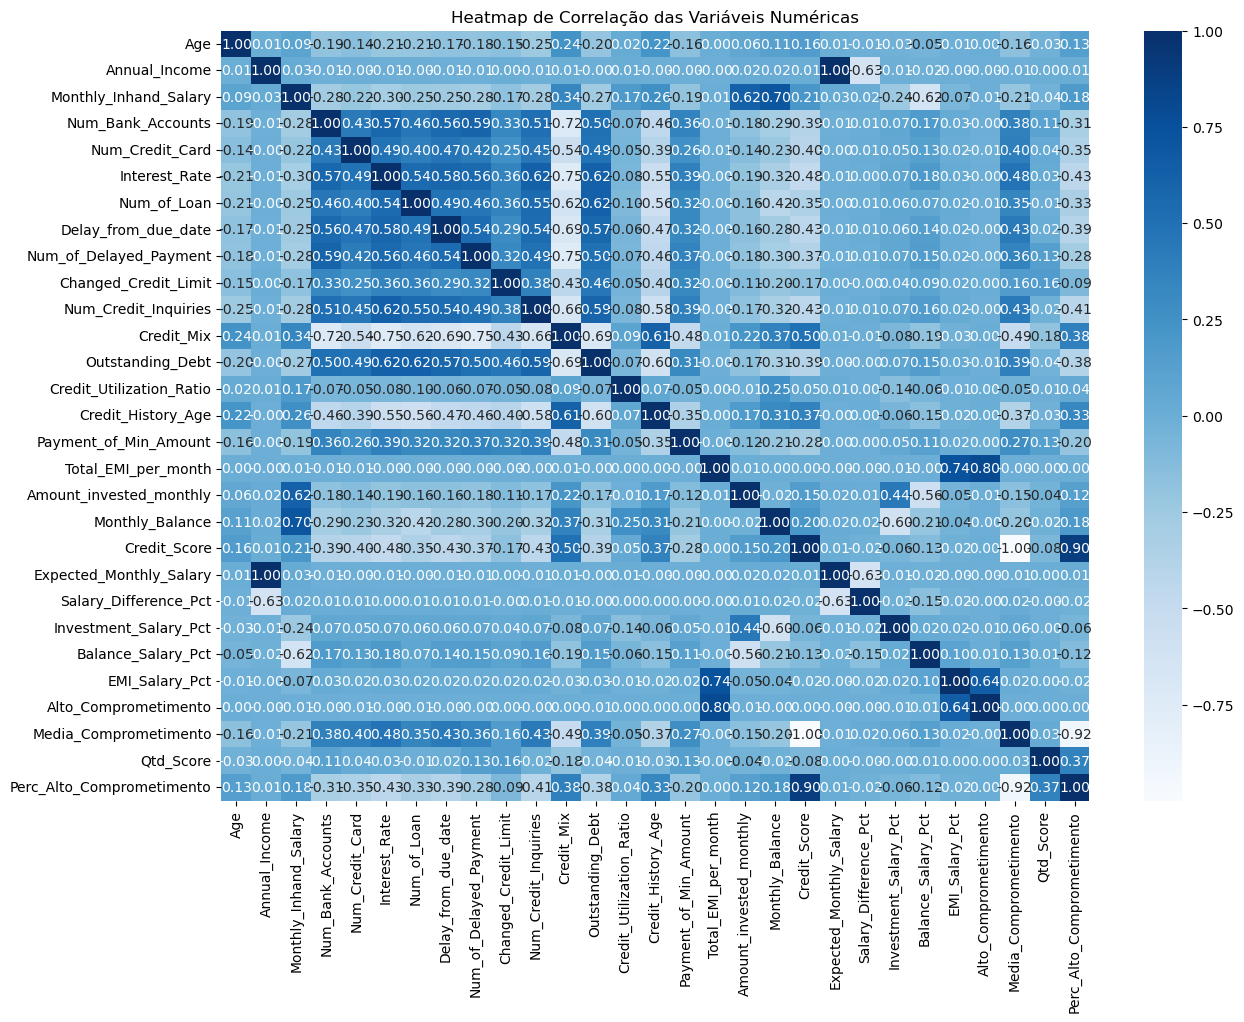

In [30]:
plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f')
plt.title('Heatmap de Correla√ß√£o das Vari√°veis Num√©ricas')
plt.show()


<i><p style='color:#006DB2' ><big><strong>10.</strong></big>Modelos de Classifica√ß√£o </p>
<br>
<p style='color:#006DB2' ><big><strong>Random Forest</strong></big></p>


<p style='color:#006DB2' ><li style='color:#006DB2' >Cria pipeline com StandardScaler e RandomForestClassifier.</li>
<li style='color:#006DB2' >Usa GridSearchCV para otimizar hiperpar√¢metros.</li>
<li style='color:#006DB2' >Exibe melhor score e par√¢metros</li></p></i>
<br>

<p style='color:#006DB2' ><big><strong>LightGBM</strong></big></p>

<p style='color:#006DB2' ><li style='color:#006DB2' >Prepara dados e aplica StandardScaler.</li>
<li style='color:#006DB2' >Treina LGBMClassifier com GridSearchCV.</li>
<li style='color:#006DB2' >Exibe melhor score e par√¢metros.</li></p></i>
<br>

<p style='color:#006DB2' ><big><strong>XGBoost</strong></big></p>

<p style='color:#006DB2' ><li style='color:#006DB2' >Prepara dados e aplica StandardScaler.</li>
<li style='color:#006DB2' >Treina XGBClassifier com GridSearchCV.</li>
<li style='color:#006DB2' >Exibe melhor score e par√¢metros.</li></p></i>

In [40]:
# ...existing code...
# remover apenas identificadores e colunas que vazam o target (manter 'Credit_Score' como target)
id_cols = [c for c in ['ID', 'Customer_ID', 'Name', 'SSN'] if c in df_analise_financeira.columns]
leak_cols = [c for c in ['Credit_Score_Label', 'Media_Comprometimento', 'Qtd_Score', 'Perc_Alto_Comprometimento'] if c in df_analise_financeira.columns]

df_modelo = df_analise_financeira.drop(columns=id_cols + leak_cols)

# garantir que o target exista
if 'Credit_Score' not in df_modelo.columns:
    raise KeyError("Coluna 'Credit_Score' n√£o encontrada. N√£o remova o target antes de criar y.")

# vari√°veis num√©ricas sem o target (confirma presen√ßa)
var_num_sem_target = [col for col in var_num if col in df_modelo.columns and col != 'Credit_Score']

X = df_modelo[var_num_sem_target].copy()
y = df_modelo['Credit_Score'].copy()

# checagens r√°pidas
print("Colunas usadas como features:", X.columns.tolist())
print("Nulos em X por coluna:\n", X.isnull().sum())
print("Nulos em y:", y.isnull().sum())

# split estratificado para manter propor√ß√£o das classes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [5, 10, None]
}

# preencher NAs do treino com mediana (aplicar mesma transforma√ß√£o no teste)
X_train_filled = X_train.fillna(X_train.median())
X_test_filled = X_test.fillna(X_train.median())

grid = GridSearchCV(pipe, param_grid, cv=3, scoring='roc_auc_ovr_weighted')
grid.fit(X_train_filled, y_train)

print("Melhor score:", grid.best_score_)
print("Melhores par√¢metros:", grid.best_params_)
# ...existing code...

Colunas usadas como features: ['Age', 'Amount_invested_monthly', 'Annual_Income', 'Balance_Salary_Pct', 'Changed_Credit_Limit', 'Credit_History_Age', 'Credit_Mix', 'Credit_Utilization_Ratio', 'Delay_from_due_date', 'EMI_Salary_Pct', 'Expected_Monthly_Salary', 'Interest_Rate', 'Investment_Salary_Pct', 'Monthly_Balance', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Num_Credit_Inquiries', 'Num_of_Delayed_Payment', 'Num_of_Loan', 'Outstanding_Debt', 'Payment_of_Min_Amount', 'Salary_Difference_Pct', 'Total_EMI_per_month']
Nulos em X por coluna:
 Age                             0
Amount_invested_monthly      8784
Annual_Income                6980
Balance_Salary_Pct          16039
Changed_Credit_Limit         2091
Credit_History_Age              0
Credit_Mix                  20195
Credit_Utilization_Ratio        0
Delay_from_due_date             0
EMI_Salary_Pct              15002
Expected_Monthly_Salary      6980
Interest_Rate                   0
Investment_Salary_Pct   

In [33]:
pd.Series(y_train).value_counts()

Credit_Score
1    42539
0    23199
2    14262
Name: count, dtype: Int64

In [35]:
X_lgbm = df_modelo[var_num_sem_target]
y_lgbm = df_modelo['Credit_Score']


X_train_lgbm, X_test_lgbm, y_train_lgbm, y_test_lgbm = train_test_split(X_lgbm, y_lgbm, test_size=0.2, random_state=42)

scaler_lgbm = StandardScaler()
X_train_lgbm_scaled = scaler_lgbm.fit_transform(X_train_lgbm)
X_test_lgbm_scaled = scaler_lgbm.transform(X_test_lgbm)

lgbm_model = LGBMClassifier(random_state=42)
param_grid_lgbm = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, -1]
}

grid_lgbm = GridSearchCV(lgbm_model, param_grid_lgbm, cv=3, scoring= 'roc_auc_ovr_weighted')
grid_lgbm.fit(X_train_lgbm_scaled, y_train_lgbm)

print("Melhor score LightGBM:", grid_lgbm.best_score_)
print("Melhores par√¢metros LightGBM:", grid_lgbm.best_params_)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0,000818 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3822
[LightGBM] [Info] Number of data points in the train set: 53333, number of used features: 24
[LightGBM] [Info] Start training from score -1,241149
[LightGBM] [Info] Start training from score -0,630765
[LightGBM] [Info] Start training from score -1,721691
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

In [45]:
X_xgb = df_modelo[var_num_sem_target]
y_xgb = df_modelo['Credit_Score']

X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_xgb, y_xgb, test_size=0.2, random_state=42)

scaler_xgb = StandardScaler()
X_train_xgb_scaled = scaler_xgb.fit_transform(X_train_xgb)
X_test_xgb_scaled = scaler_xgb.transform(X_test_xgb)

xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None]
}
grid_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=3, scoring='roc_auc_ovr_weighted')
grid_xgb.fit(X_train_xgb_scaled, y_train_xgb)

print("Melhor score XGBoost:", grid_xgb.best_score_)
print("Melhores par√¢metros XGBoost:", grid_xgb.best_params_)


Melhor score XGBoost: 0.8790889613286909
Melhores par√¢metros XGBoost: {'max_depth': 10, 'n_estimators': 200}


A Melhor combina√ß√£o para o modelo foi o XGBoost com a metrica roc_auc_ovr_weighted que deu uma precis√£o de 87,9%. Pois o XGBoost √© muito eficaz em problemas de classifica√ß√£o com dados tabulares, porque combina √°rvores de decis√£o em um esquema de boosting que corrige erros sequencialmente, lida bem com intera√ß√µes complexas entre vari√°veis e junto com a m√©trica roc_auc_ovr_weighted que mede a capacidade do modelo de separar corretamente cada classe em uma configura√ß√£o multiclasses (‚Äúone-vs-rest‚Äù) e ainda pondera o desempenho de cada classe pelo seu tamanho.